# Исследования для "В один клик"
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:
   - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
   - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
   - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
   - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
   
  1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.\
  2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.\
  3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
  
### Цель исследования:

  1) Изучить исходные данные.\
  2) Изучить и обработать выбросы.\
  3) Провести корреляционный анализ требуемых величин.\
  4) Выполнить обучение моделей.\
  5) Выбрать лучшую модель и рассмотреть её метрики.\
  6) Выполнить сегментацию покупателей и представить её в форме итогового вывода.
  
   #### Ход исследования:
  
   Данные получим из файлов market_file.csv, market_money.csv, market_time.csv, money.csv. О качестве данных ничего не известно, поэтому необходимо будет тщательно изучить их.
   
   На этапе предобработки данных найдём все пропущенные значения, обработаем их, удалим явные выбросы, избавимся от дубликатов. После этого исследуем зависимости между параметрами, построим необходимые диаграммы и приступим к обучению модели по прогнозам.
   
   Таким образом, работа состоит из следующих этапов:
   
   - обзор полученных данных;
   - предобработка данных;
   - проведение анализа по конкретным столбцам;
   - ранжирование покупателей в зависимости от времени;
   - нахождение наиболее сильных связей между признаками;
   - обучение четырёх моделей;
   - выбор лучшей модели;
   - обучение модели и прогнозирование;
   - сегментация покупателей и написание рекомендаций;
   - написание общего вывода.

### Загрузка данных

Добавим необходимые для работы библиотеки.

In [1]:
!pip install -U scikit-learn -q
!pip install --upgrade pandas -q # -q убирает необязательные выводы в командах Linux
!pip install -U seaborn -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install -U matplotlib

In [3]:
pip install --force-reinstall scipy==1.8.0

     |████████████████████████████████| 42.1 MB 67 kB/s  eta 0:00:01
     |████████████████████████████████| 17.3 MB 58.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install -U phik

     |████████████████████████████████| 686 kB 2.5 MB/s eta 0:00:01


In [5]:
!pip install -U shap -q

In [6]:
# Добавление библиотек и функций:
import warnings
warnings.filterwarnings("ignore", "\nPyarrow", DeprecationWarning)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import spearmanr

from scipy import stats as st

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import shap

import phik
from phik.report import plot_correlation_matrix

Откроем исходные датафреймы и посмотрим на общую информацию по ним.

In [7]:
# Открытие датафреймов:
market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
 
market_file.info()
print()
market_money.info()
print()
market_time.info()
print()
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

#### Вывод:
Из общего вида всех таблиц: пропусков нигде нет, все строки заполнены; типы данных вопросов не вызывают. Можем поменять названия некоторых столбцов.

### Предобработка данных

Начнём с просмотра явных дубликатов в первой таблице.

In [8]:
# Проверка на явные дубликаты:
print(market_file.duplicated().sum())
print(market_money.duplicated().sum())
print(market_time.duplicated().sum())
print(money.duplicated().sum())

0
0
0
0


Явных дубликатов не обнаружено, проверим неявные.

In [9]:
# проверка на неявные дубликаты:
print(market_file['id'].duplicated().sum())

0


Отлично, данные действительно собраны корректно. Изменим названия столбцов в первой таблице.

In [10]:
# Изменение названий столбцов:
market_file = market_file.rename(columns={'Маркет_актив_6_мес': 'Активность за 6 мес',
                                          'Маркет_актив_тек_мес': 'Активность за тек мес',
                                          'Акционные_покупки': 'Акционные покупки',
                                          'Популярная_категория': 'Популярная категория',
                                          'Средний_просмотр_категорий_за_визит': 'Средний просмотр категорий за визит',
                                          'Неоплаченные_продукты_штук_квартал': 'Неоплаченные продукты, штук за квартал',
                                          'Ошибка_сервиса': 'Ошибка сервиса',
                                          'Страниц_за_визит': 'Страниц за визит'})

market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      1300 non-null   int64  
 1   Покупательская активность               1300 non-null   object 
 2   Тип сервиса                             1300 non-null   object 
 3   Разрешить сообщать                      1300 non-null   object 
 4   Активность за 6 мес                     1300 non-null   float64
 5   Активность за тек мес                   1300 non-null   int64  
 6   Длительность                            1300 non-null   int64  
 7   Акционные покупки                       1300 non-null   float64
 8   Популярная категория                    1300 non-null   object 
 9   Средний просмотр категорий за визит     1300 non-null   int64  
 10  Неоплаченные продукты, штук за квартал  1300 non-null   int6

Проверим правильность заполнения отдельных столбцов.

In [11]:
# Вывод уникальных значений:
print('Покупательская активность:', market_file['Покупательская активность'].unique())
print('Тип сервиса:', market_file['Тип сервиса'].unique())
print('Разрешить сообщать:', market_file['Разрешить сообщать'].unique())
print('Популярная категория:', market_file['Популярная категория'].unique())

Покупательская активность: ['Снизилась' 'Прежний уровень']
Тип сервиса: ['премиум' 'стандартт' 'стандарт']
Разрешить сообщать: ['да' 'нет']
Популярная категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Видим дубль в "типе сервиса". Исправим данную неточность.

In [12]:
# Исправление неточности записи:
market_file['Тип сервиса'] = (market_file['Тип сервиса'].replace('премиум', 'Премиум', regex=True)
                                                       .replace('стандартт', 'Стандарт', regex=True)
                                                       .replace('стандарт', 'Стандарт', regex=True))
market_file['Разрешить сообщать'] = (market_file['Разрешить сообщать'].replace('да', 'Да', regex=True)
                                                                     .replace('нет', 'Нет', regex=True))

print('Тип сервиса:', market_file['Тип сервиса'].unique())
print('Разрешить сообщать:', market_file['Разрешить сообщать'].unique())

Тип сервиса: ['Премиум' 'Стандарт']
Разрешить сообщать: ['Да' 'Нет']


Теперь проделаем то же самое с двумя другими таблицами.

In [13]:
# Вывод уникальных значений:
print('Период в "market_money":', market_money['Период'].unique())
print('Период в "market_time":', market_time['Период'].unique())

Период в "market_money": ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Период в "market_time": ['текущий_месяц' 'предыдцщий_месяц']


In [14]:
# Корректируем данные:
market_money['Период'] = (market_money['Период'].replace('препредыдущий_месяц', 'Предпредыдущий месяц', regex=True)
                                                .replace('текущий_месяц', 'Текущий месяц', regex=True)
                                                .replace('предыдущий_месяц', 'Предыдущий месяц', regex=True))
market_time['Период'] = (market_time['Период'].replace('текущий_месяц', 'Текущий месяц', regex=True)
                                              .replace('предыдцщий_месяц', 'Предыдущий месяц', regex=True))

print('Период в "market_money":', market_money['Период'].unique())
print('Период в "market_time":', market_time['Период'].unique())

Период в "market_money": ['Предпредыдущий месяц' 'Текущий месяц' 'Предыдущий месяц']
Период в "market_time": ['Текущий месяц' 'Предыдущий месяц']


In [15]:
# Удалим дубликаты, если они появились:
market_money = market_money.drop_duplicates()
market_time = market_time.drop_duplicates()

#### Вывод:
В ходе предобработки данных была произведена проверка на явные и неявные дубликаты, откорректированы названия столбцов в первом датафрейме, обработаны данные в столбцах "Тип сервиса" и "Разрешить сообщать". Также обработаны данные в столбцах "Период" в двух других датафреймах. Таблицы готовы к исследовательскому анализу.

### Исследовательский анализ данных

На данном этапе нам нужно отобрать клиентов с покупательской активностью не менее трёх месяцев. Остальные данные нам не понадобятся. Отбор будем осуществлять по столбцу "Длительность", который показывает количество дней с момента регистрации на сайте. Увы, точный месяц нам неизвестен, поэтому установим произвольную границу в 92 дня.

In [16]:
# Посмотрим минимальное количество дней:
market_file['Длительность'].sort_values().min()

110

Что ж, все пользователи зарегестрировались больше 3 месяцев назад. Таким образом, первый DF нам ничем не поможет. Переходим к анализу "market_money". 

In [17]:
# Вспомним, как она выглядит:
display(market_money.head(10))

,id,Период,Выручка
0,215348,Предпредыдущий месяц,0.0
1,215348,Текущий месяц,3293.1
2,215348,Предыдущий месяц,0.0
3,215349,Предпредыдущий месяц,4472.0
4,215349,Текущий месяц,4971.6
5,215349,Предыдущий месяц,5216.0
6,215350,Предпредыдущий месяц,4826.0
7,215350,Текущий месяц,5058.4
8,215350,Предыдущий месяц,5457.5
9,215351,Текущий месяц,6610.4


По условию нам необходимо, чтобы за все три месяца от покупателя был приток денег. Зададим нужное условие и посмотрим на результат.

In [18]:
# Отбор нужных строк:
useless_df = market_money[market_money['Выручка']==0]
display(useless_df)

,id,Период,Выручка
0,215348,Предпредыдущий месяц,0.0
2,215348,Предыдущий месяц,0.0
28,215357,Предпредыдущий месяц,0.0
29,215357,Предыдущий месяц,0.0
34,215359,Предыдущий месяц,0.0
35,215359,Предпредыдущий месяц,0.0


Всего 3 человека стали делать покупки в этом месяце. Информация о них для нас бесполезна, удаляем.

In [19]:
# Удаляем ненужные данные:
market_file = market_file[(market_file['id'] != 215348) & (market_file['id'] != 215357) & (market_file['id'] != 215359)]
market_money = market_money[(market_money['id'] != 215348) & (market_money['id'] != 215357) & (market_money['id'] != 215359)]
market_time = market_time[(market_time['id'] != 215348) & (market_time['id'] != 215357) & (market_time['id'] != 215359)]
money = money[(money['id'] != 215348) & (money['id'] != 215357) & (money['id'] != 215359)]

market_file.info()
print()
market_money.info()
print()
market_time.info()
print()
money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      1297 non-null   int64  
 1   Покупательская активность               1297 non-null   object 
 2   Тип сервиса                             1297 non-null   object 
 3   Разрешить сообщать                      1297 non-null   object 
 4   Активность за 6 мес                     1297 non-null   float64
 5   Активность за тек мес                   1297 non-null   int64  
 6   Длительность                            1297 non-null   int64  
 7   Акционные покупки                       1297 non-null   float64
 8   Популярная категория                    1297 non-null   object 
 9   Средний просмотр категорий за визит     1297 non-null   int64  
 10  Неоплаченные продукты, штук за квартал  1297 non-null   int64  
 

Удаление прошло успешно. На всякий случай проверим другие таблицы.

In [20]:
# Смотрим таблицу "money":
print(money[money['Прибыль']==0]['id'].count())

0


In [21]:
# Смотрим таблицу "market_time":
print(market_time[market_time['минут']==0]['id'].count())

0


In [22]:
# Смотрим таблицу "market_file":
print(market_file[market_file['Страниц за визит']==0]['id'].count())

0


Проверим данные на наличие выбросов и аномалий. Для этого построим boxplot'ы и гистограммы.

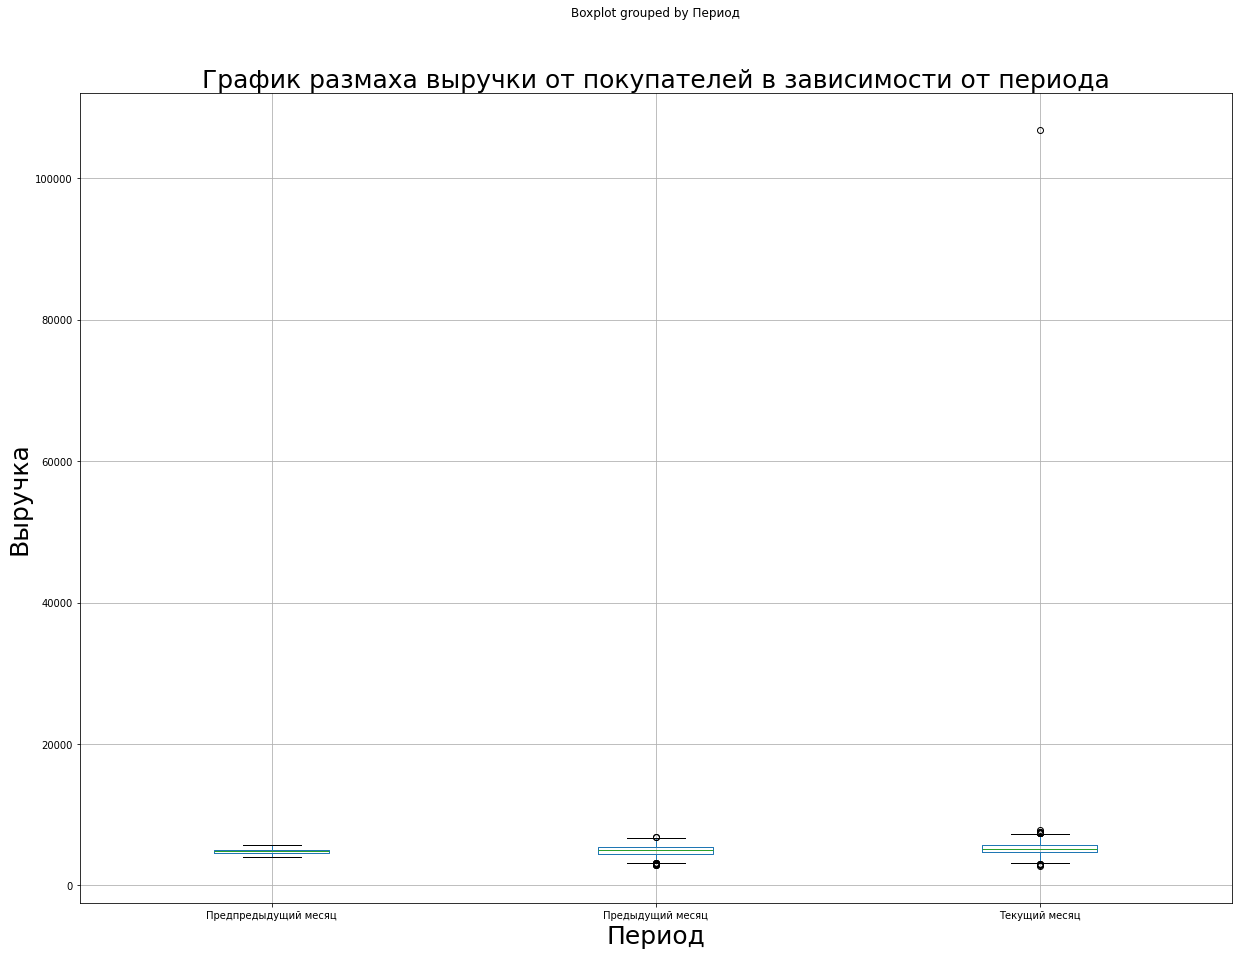

,count,mean,std,min,25%,50%,75%,max
Период,,,,,,,,
Предпредыдущий месяц,1297.0,4836.367772,333.438742,4098.0,4585.0,4812.0,5055.0,5663.0
Предыдущий месяц,1297.0,4948.339630,701.228571,2890.0,4498.5,5005.5,5409.0,6869.5
Текущий месяц,1297.0,5316.449268,2942.469139,2758.7,4706.6,5180.3,5761.3,106862.2


In [23]:
# График размаха по выручке за последние периоды:
market_money.boxplot(column='Выручка', by='Период', figsize=(20, 15))
plt.title('График размаха выручки от покупателей в зависимости от периода', fontsize=25)
plt.ylabel('Выручка', fontsize=25)
plt.xlabel('Период', fontsize=25)
plt.show()

market_money.groupby('Период')['Выручка'].describe()

Видим явный выброс в текущем месяце. Конечно, на реальном рынке возможно всё, но для нашего анализа такие данные могут сказаться пагубно. Удаляем.

In [24]:
# Удаляем явный выброс в "market_money":
market_money = market_money[market_money['Выручка']<20000]
market_money.groupby('Период')['Выручка'].describe()

,count,mean,std,min,25%,50%,75%,max
Период,,,,,,,,
Предпредыдущий месяц,1297.0,4836.367772,333.438742,4098.0,4585.00,4812.00,5055.000,5663.0
Предыдущий месяц,1297.0,4948.339630,701.228571,2890.0,4498.50,5005.50,5409.000,6869.5
Текущий месяц,1296.0,5238.096065,834.318717,2758.7,4706.05,5179.95,5759.275,7799.4


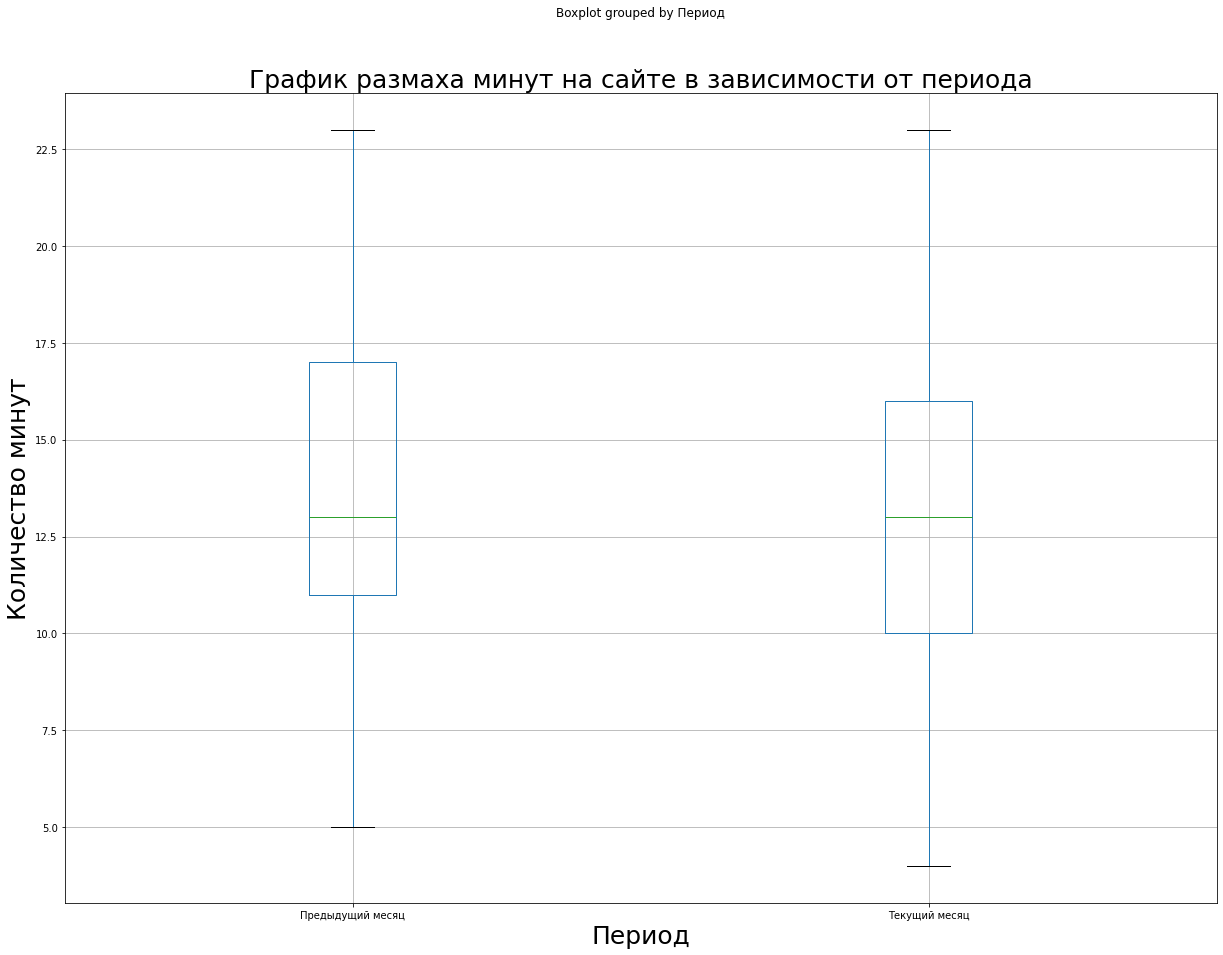

,count,mean,std,min,25%,50%,75%,max
Период,,,,,,,,
Предыдущий месяц,1297.0,13.469545,3.936323,5.0,11.0,13.0,17.0,23.0
Текущий месяц,1297.0,13.211257,4.220222,4.0,10.0,13.0,16.0,23.0


In [25]:
# График размаха по времени на сайте за последние периоды:
market_time.boxplot(column='минут', by='Период', figsize=(20, 15))
plt.title('График размаха минут на сайте в зависимости от периода', fontsize=25)
plt.ylabel('Количество минут', fontsize=25)
plt.xlabel('Период', fontsize=25)
plt.show()

market_time.groupby('Период')['минут'].describe()

На удивление очень ровное распределение.

Распределение величин в основной таблице будем смотреть относительно типа сервиса.

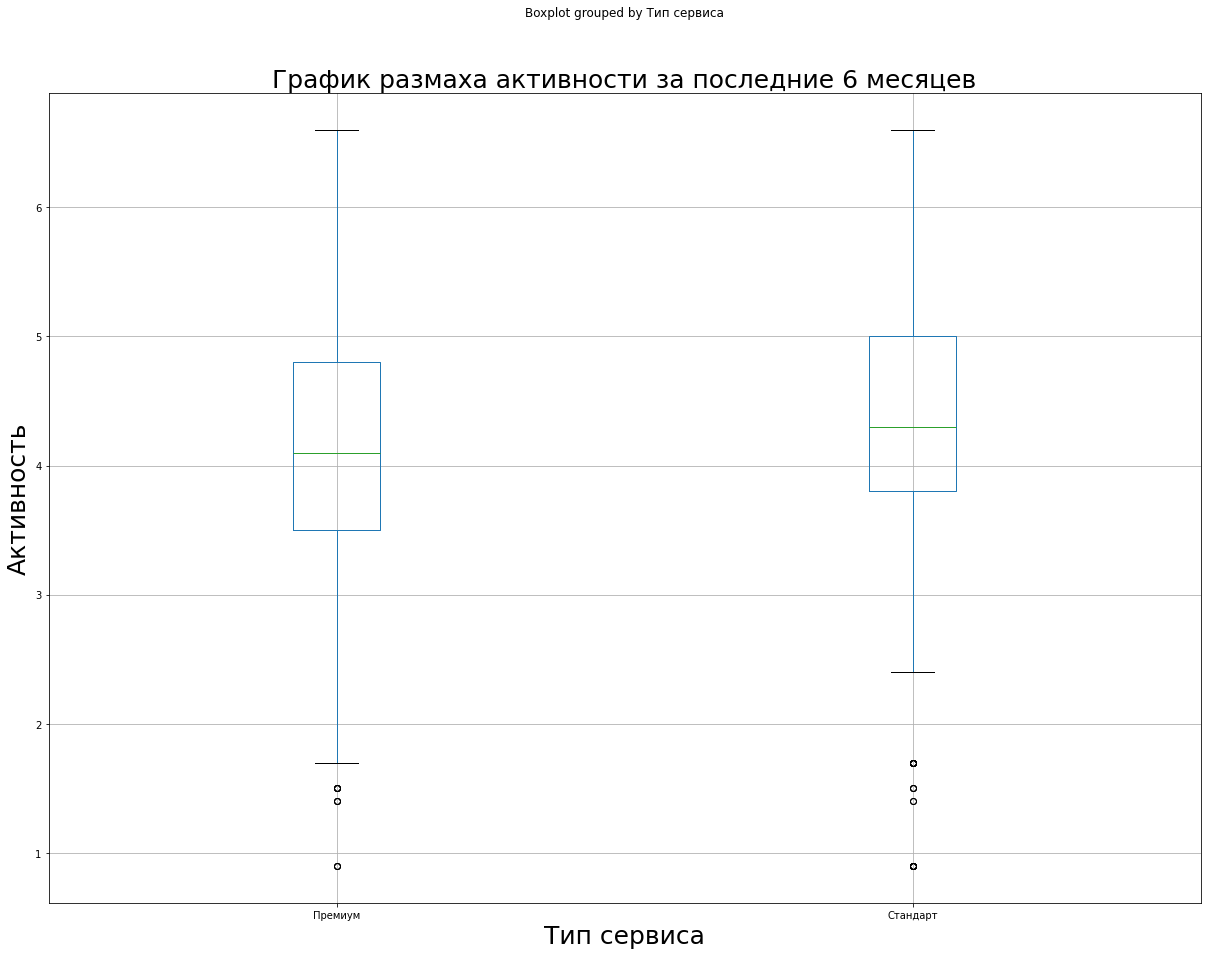

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,4.117867,1.019581,0.9,3.5,4.1,4.8,6.6
Стандарт,922.0,4.309978,1.009277,0.9,3.8,4.3,5.0,6.6


In [26]:
# График размаха по активности за последние 6 месяцев:
market_file.boxplot(column='Активность за 6 мес', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха активности за последние 6 месяцев', fontsize=25)
plt.ylabel('Активность', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Активность за 6 мес'].describe()

Есть пара выбивающихся значений, но удалять их нет смысла.

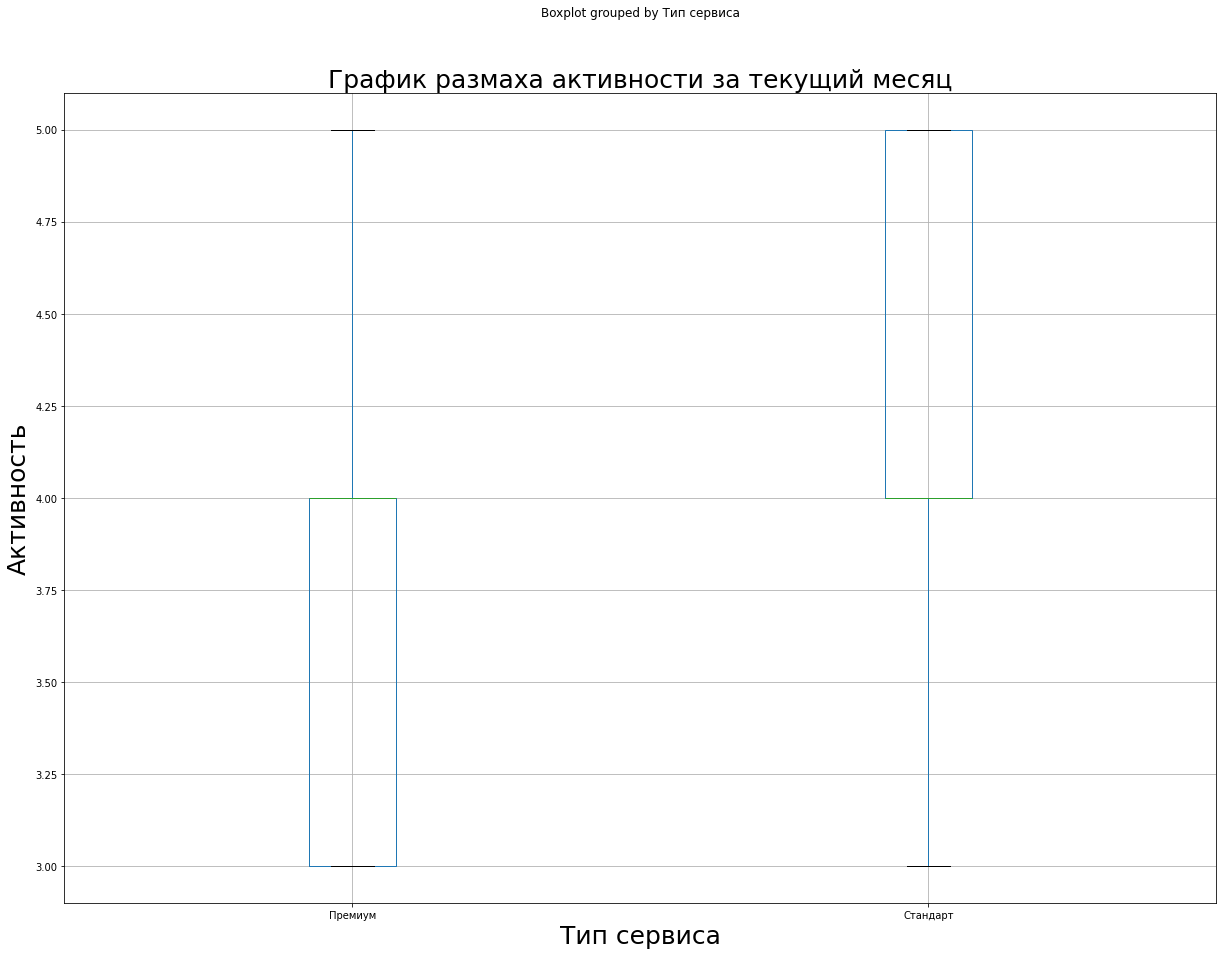

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,3.930667,0.716866,3.0,3.0,4.0,4.0,5.0
Стандарт,922.0,4.041215,0.685220,3.0,4.0,4.0,5.0,5.0


In [27]:
# График размаха по активности за текущий месяц:
market_file.boxplot(column='Активность за тек мес', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха активности за текущий месяц', fontsize=25)
plt.ylabel('Активность', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Активность за тек мес'].describe()

Интересно, выбросов не наблюдаем, но покупатели с типом "стандарт" явно чаще сталкивались с рекламой в этом месяце.

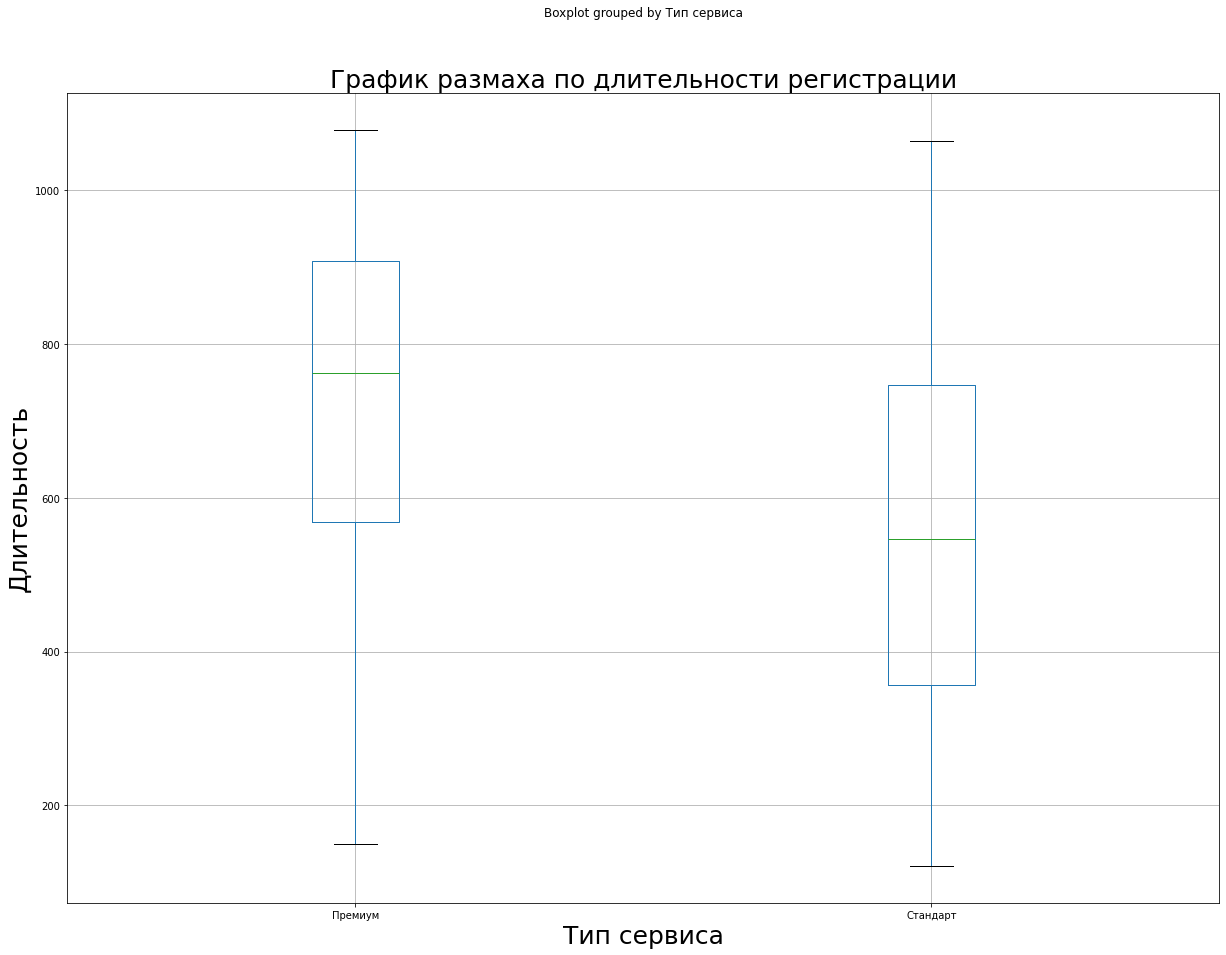

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,724.056000,231.607622,150.0,569.0,763.0,908.50,1079.0
Стандарт,922.0,553.754881,239.038212,121.0,357.0,546.5,746.75,1064.0


In [28]:
# График размаха по длительности регистрации:
market_file.boxplot(column='Длительность', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по длительности регистрации', fontsize=25)
plt.ylabel('Длительность', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Длительность'].describe()

Выбросов не обнаружено. Интересная деталь: люди с типом подписки "Премиум" дольше зарегестрированы на площадке.

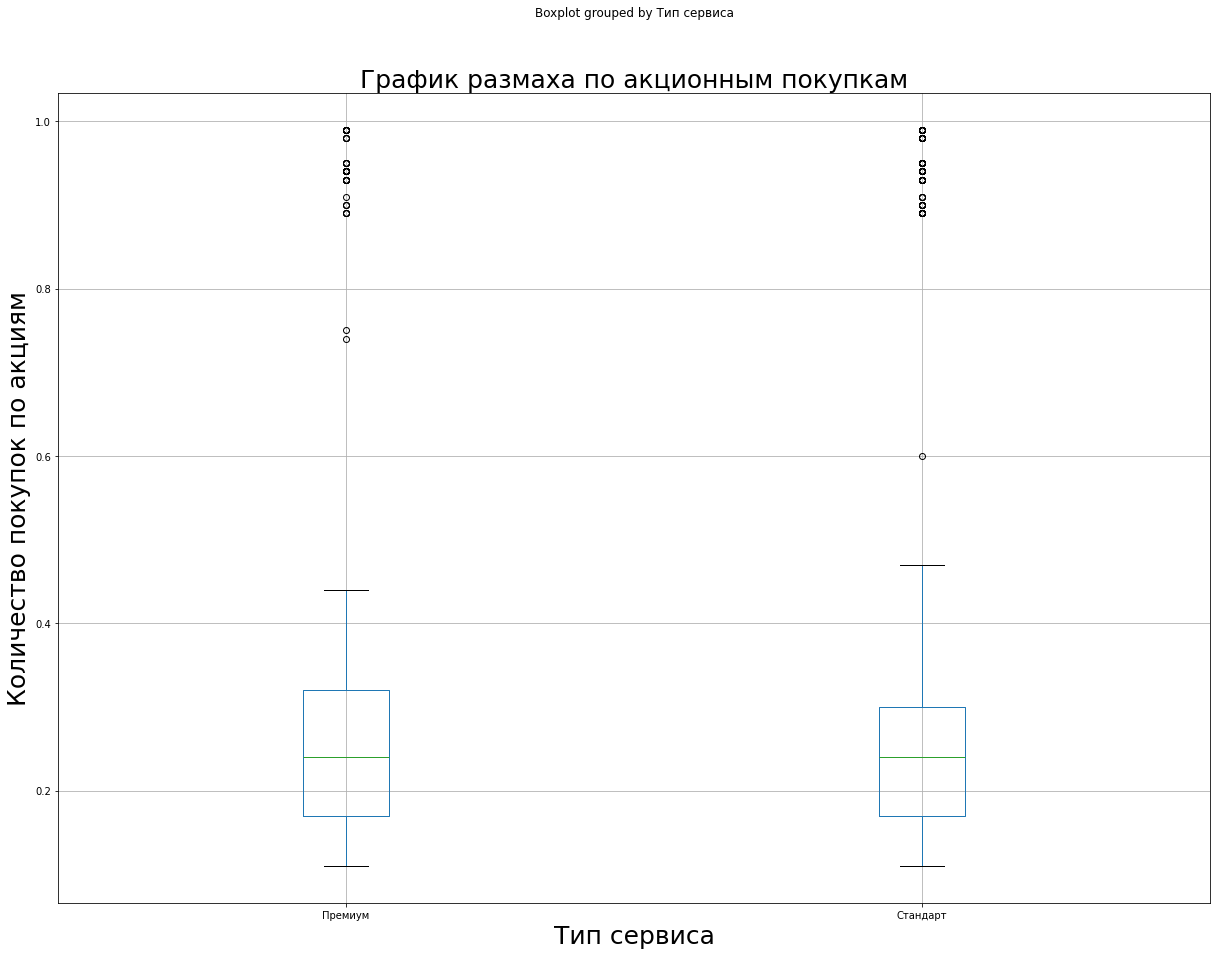

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,0.336747,0.259873,0.11,0.17,0.24,0.32,0.99
Стандарт,922.0,0.313959,0.245219,0.11,0.17,0.24,0.30,0.99


In [29]:
# График размаха по акционным покупкам:
market_file.boxplot(column='Акционные покупки', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по акционным покупкам', fontsize=25)
plt.ylabel('Количество покупок по акциям', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Акционные покупки'].describe()

Есть несколько клиентов (независимо от типа подписки), которые практически все покупки совершают только по акциям. В основном люди заполняют корзину акционными товарами до 40%.

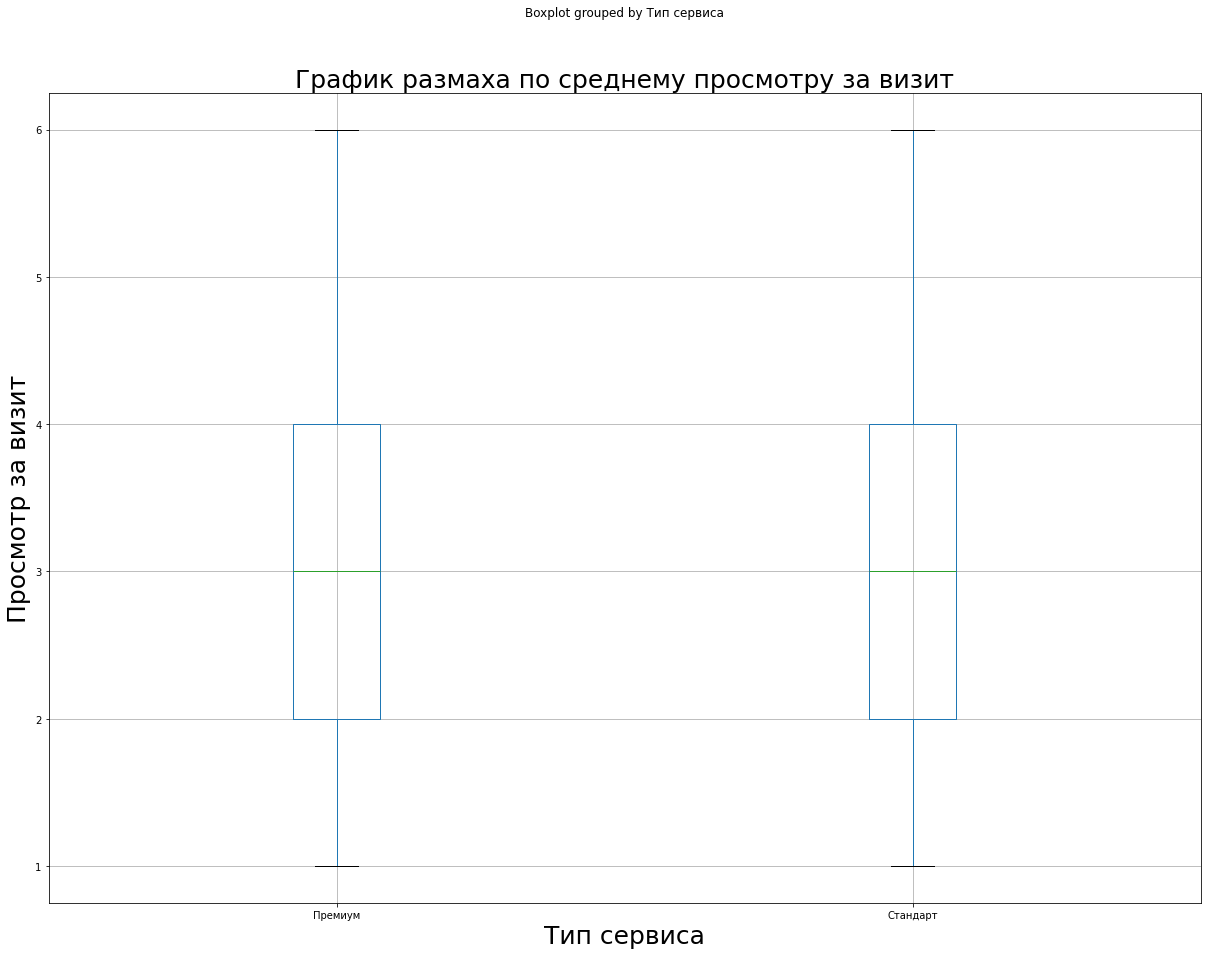

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,2.997333,1.233444,1.0,2.0,3.0,4.0,6.0
Стандарт,922.0,3.377440,1.386554,1.0,2.0,3.0,4.0,6.0


In [30]:
# График размаха по среднему просмотру за визит:
market_file.boxplot(column='Средний просмотр категорий за визит', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по среднему просмотру за визит', fontsize=25)
plt.ylabel('Просмотр за визит', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Средний просмотр категорий за визит'].describe()

Всё очень ровно.

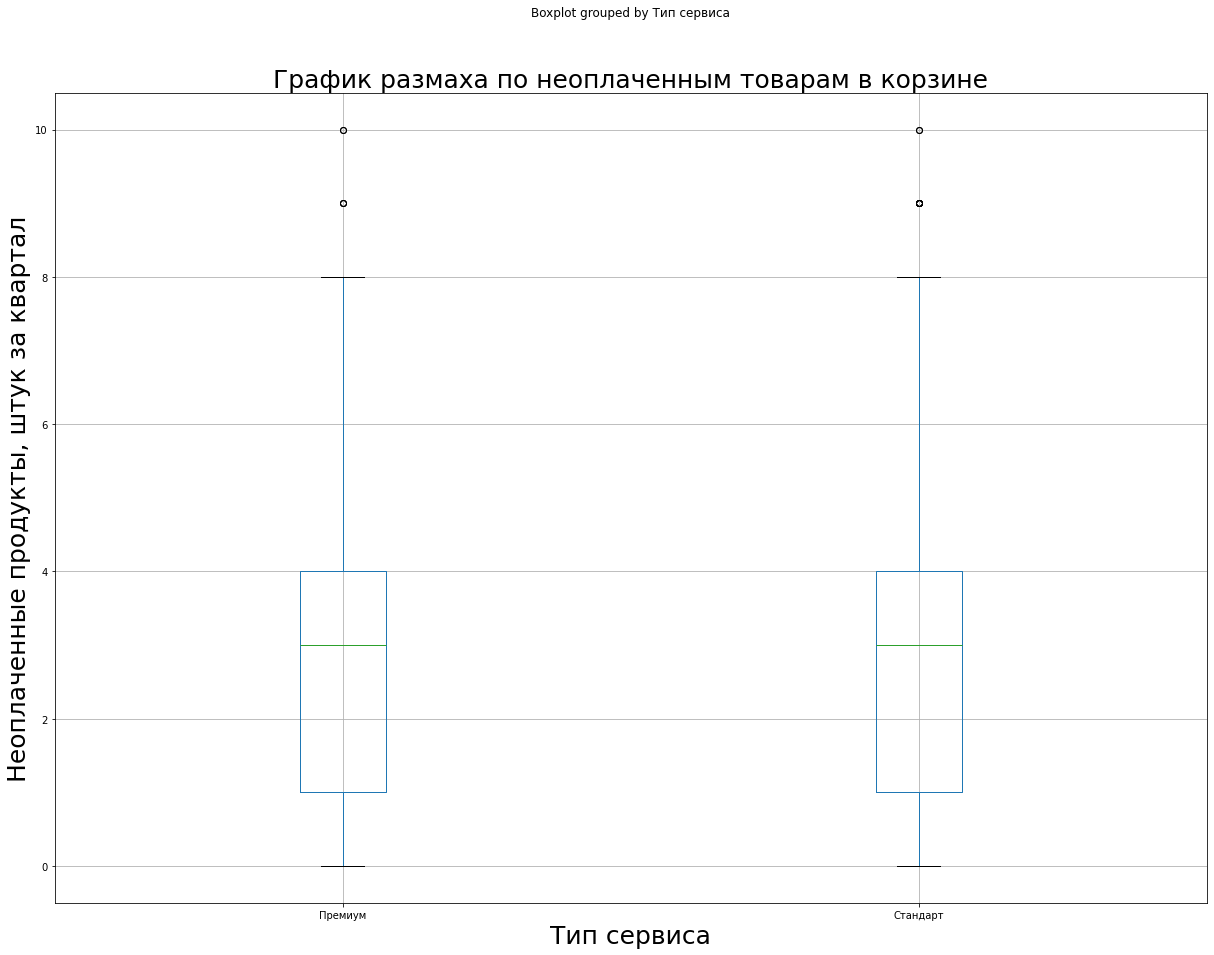

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,3.005333,1.970361,0.0,1.0,3.0,4.0,10.0
Стандарт,922.0,2.774403,1.971864,0.0,1.0,3.0,4.0,10.0


In [31]:
# График размаха по неоплаченным товарам в корзине:
market_file.boxplot(column='Неоплаченные продукты, штук за квартал', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по неоплаченным товарам в корзине', fontsize=25)
plt.ylabel('Неоплаченные продукты, штук за квартал', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Неоплаченные продукты, штук за квартал'].describe()

По два человека с каждой стороны не любят чистить корзину с товарами.

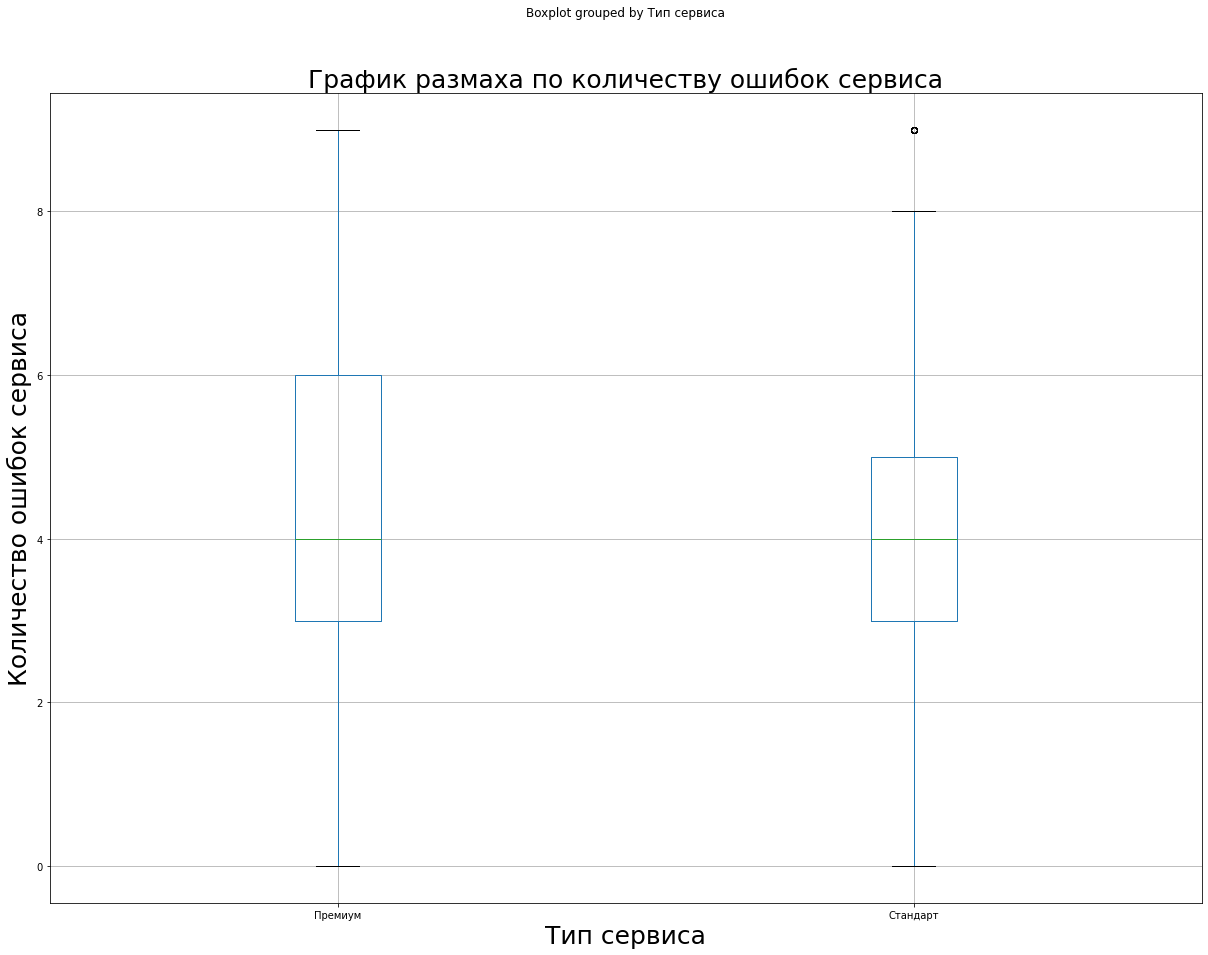

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,4.27200,2.033316,0.0,3.0,4.0,6.0,9.0
Стандарт,922.0,4.14859,1.916453,0.0,3.0,4.0,5.0,9.0


In [32]:
# График размаха по количеству ошибок сервиса:
market_file.boxplot(column='Ошибка сервиса', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по количеству ошибок сервиса', fontsize=25)
plt.ylabel('Количество ошибок сервиса', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Ошибка сервиса'].describe()

В целом покупатели обеих категорий одинаково часто сталкивались с ошибками сервиса.

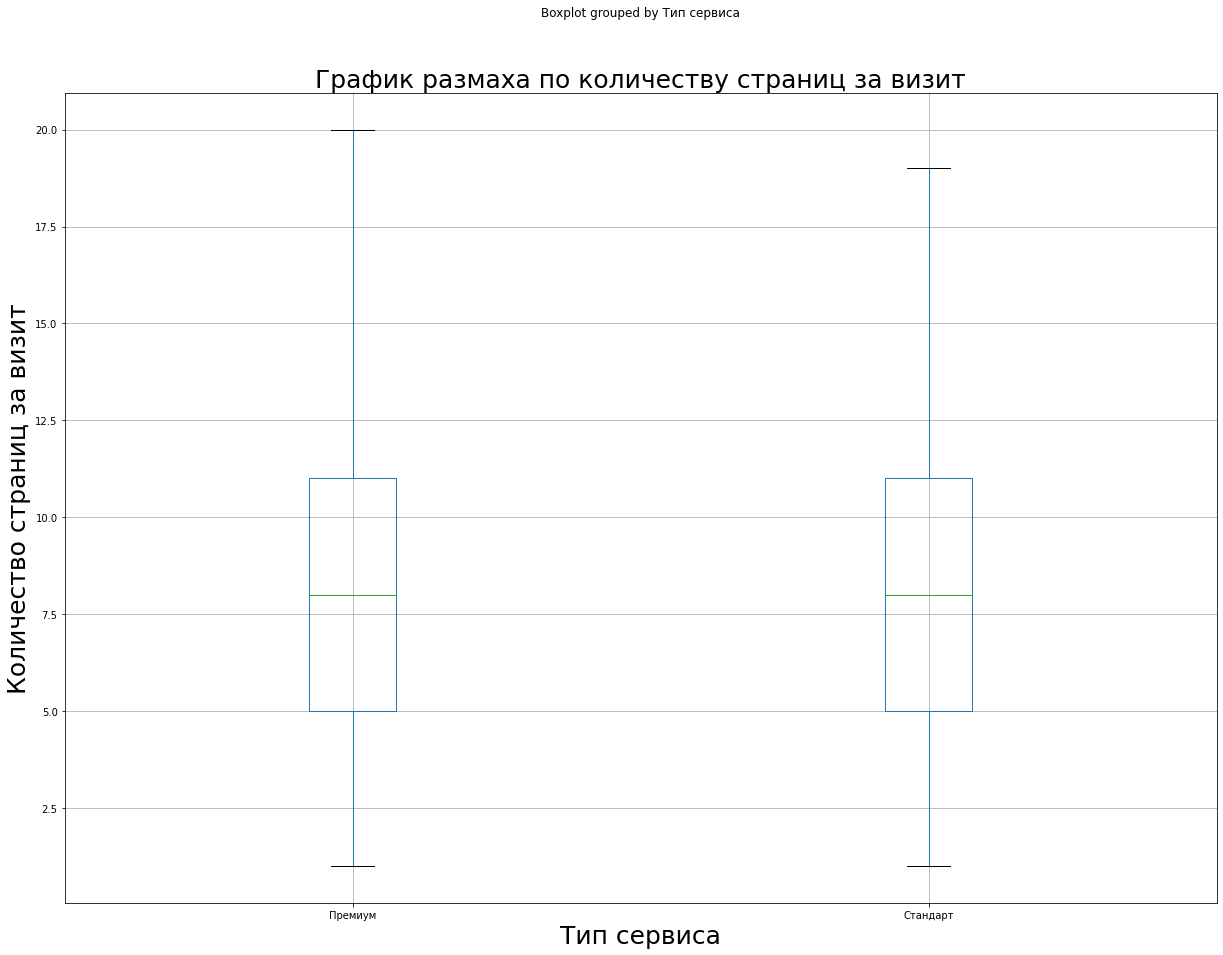

,count,mean,std,min,25%,50%,75%,max
Тип сервиса,,,,,,,,
Премиум,375.0,8.317333,4.075897,1.0,5.0,8.0,11.0,20.0
Стандарт,922.0,8.133406,3.937154,1.0,5.0,8.0,11.0,19.0


In [33]:
# График размаха по количеству страниц за визит:
market_file.boxplot(column='Страниц за визит', by='Тип сервиса', figsize=(20, 15))
plt.title('График размаха по количеству страниц за визит', fontsize=25)
plt.ylabel('Количество страниц за визит', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

market_file.groupby('Тип сервиса')['Страниц за визит'].describe()

Всё так же ровно.

##### Промежуточный вывод:
В ходе анализа boxplot'ов количественных данных всех таблиц был выявлен и удалён один явный выброс из "market_money"; остальные данные вопросов не вызывают.

Теперь построим гистограммы для данных из "market_file" и "money".

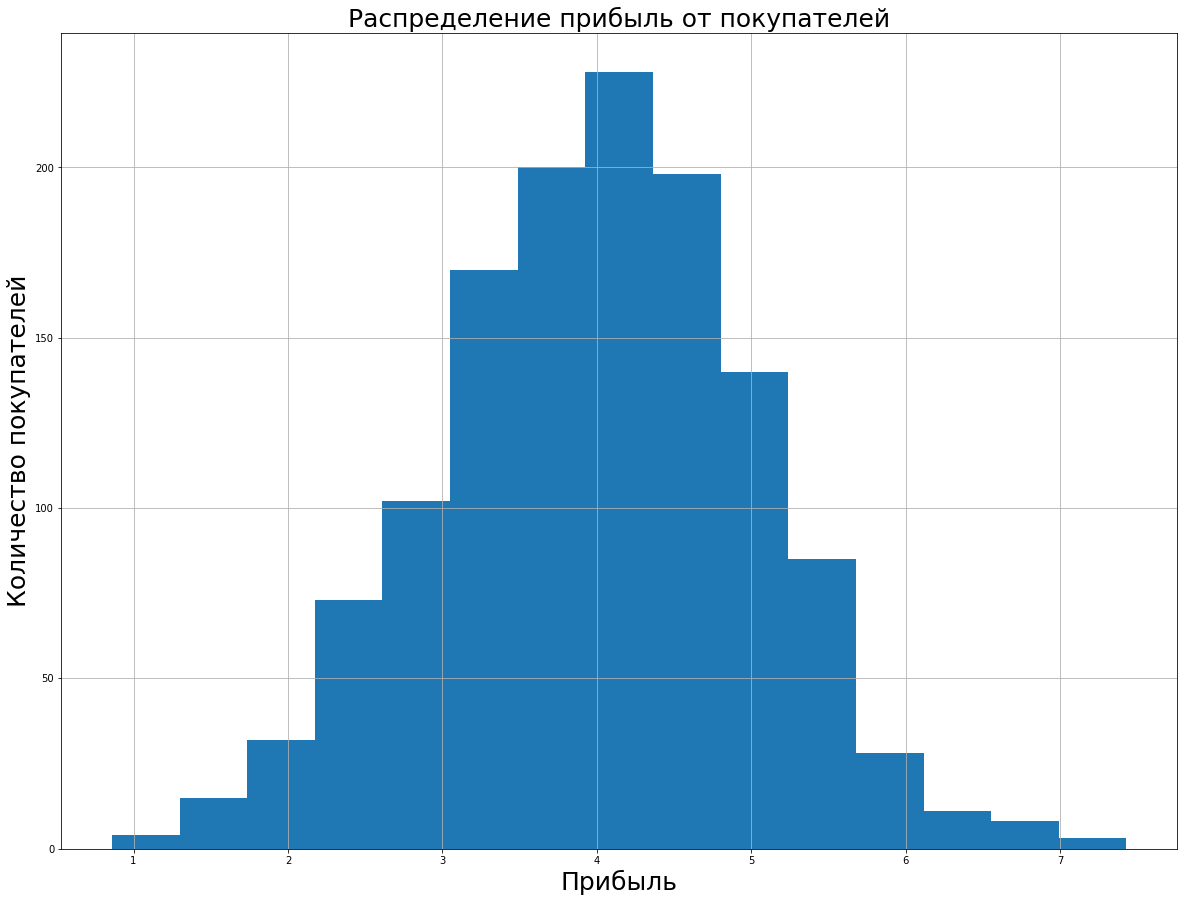

In [34]:
money['Прибыль'].hist(bins=15, figsize=(20, 15))
plt.title('Распределение прибыль от покупателей', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Прибыль', fontsize=25)
plt.show()

Практически идеальное нормальное распределение.

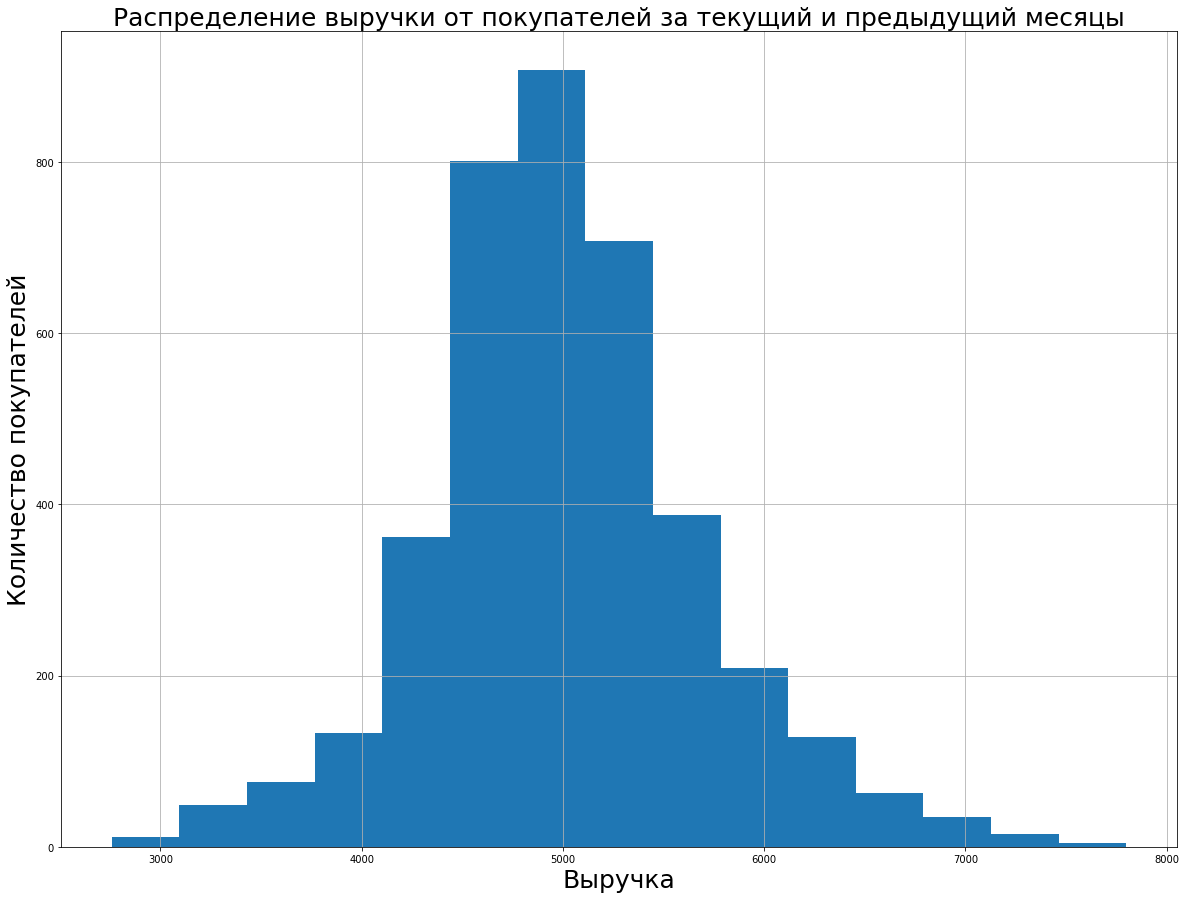

In [35]:
market_money['Выручка'].hist(bins=15, figsize=(20, 15))
plt.title('Распределение выручки от покупателей за текущий и предыдущий месяцы', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Выручка', fontsize=25)
plt.show()

Нормальное распределение с острым пикомь в районе 5000.

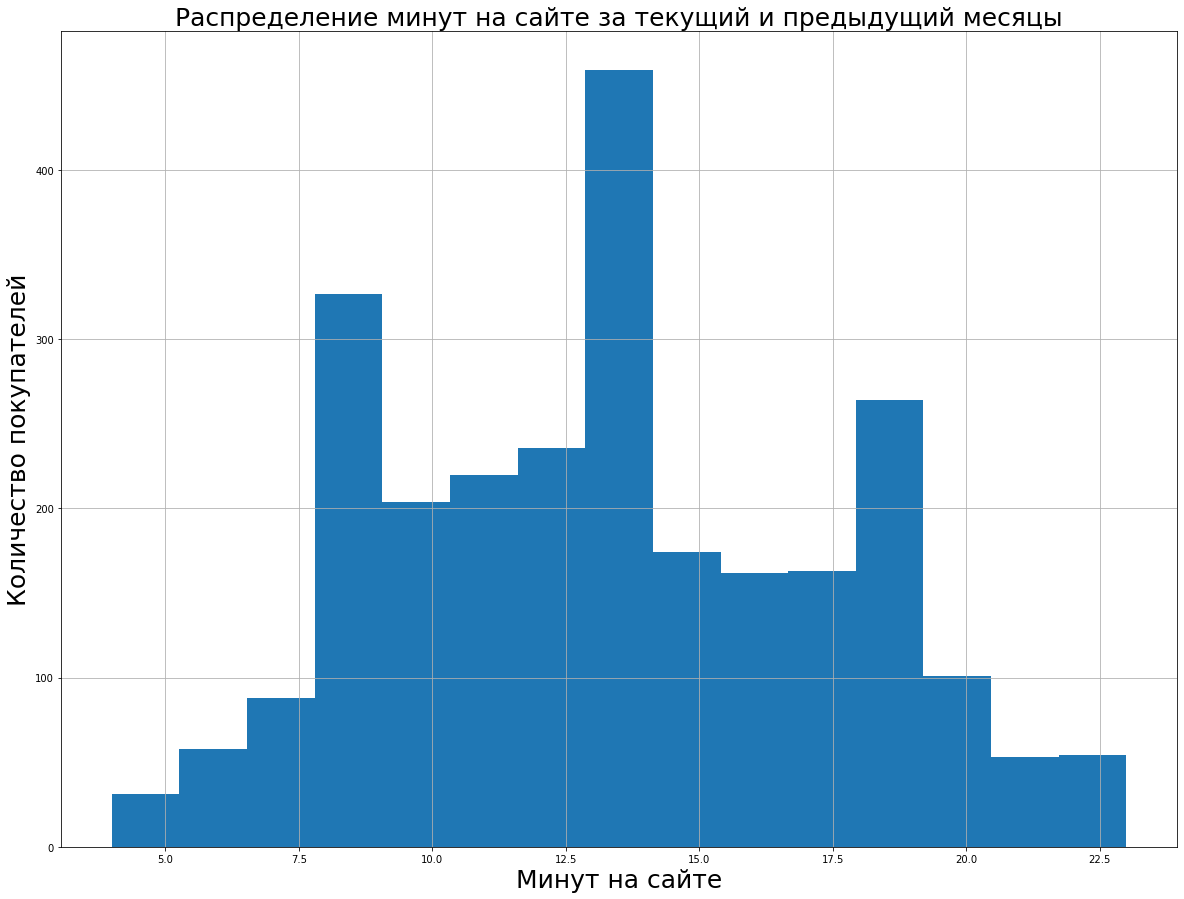

In [36]:
market_time['минут'].hist(bins=15, figsize=(20, 15))
plt.title('Распределение минут на сайте за текущий и предыдущий месяцы', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Минут на сайте', fontsize=25)
plt.show()

Есть явные выбросы.

Перейдём к анализу распределения величин основной таблицы.

In [37]:
# Создание сводной таблицы:
df_1 = market_file.pivot_table(index='Покупательская активность', values='id', aggfunc='count')
df_1.columns = ['Количество']
df_1 = df_1.sort_values(by='Количество', ascending=True)

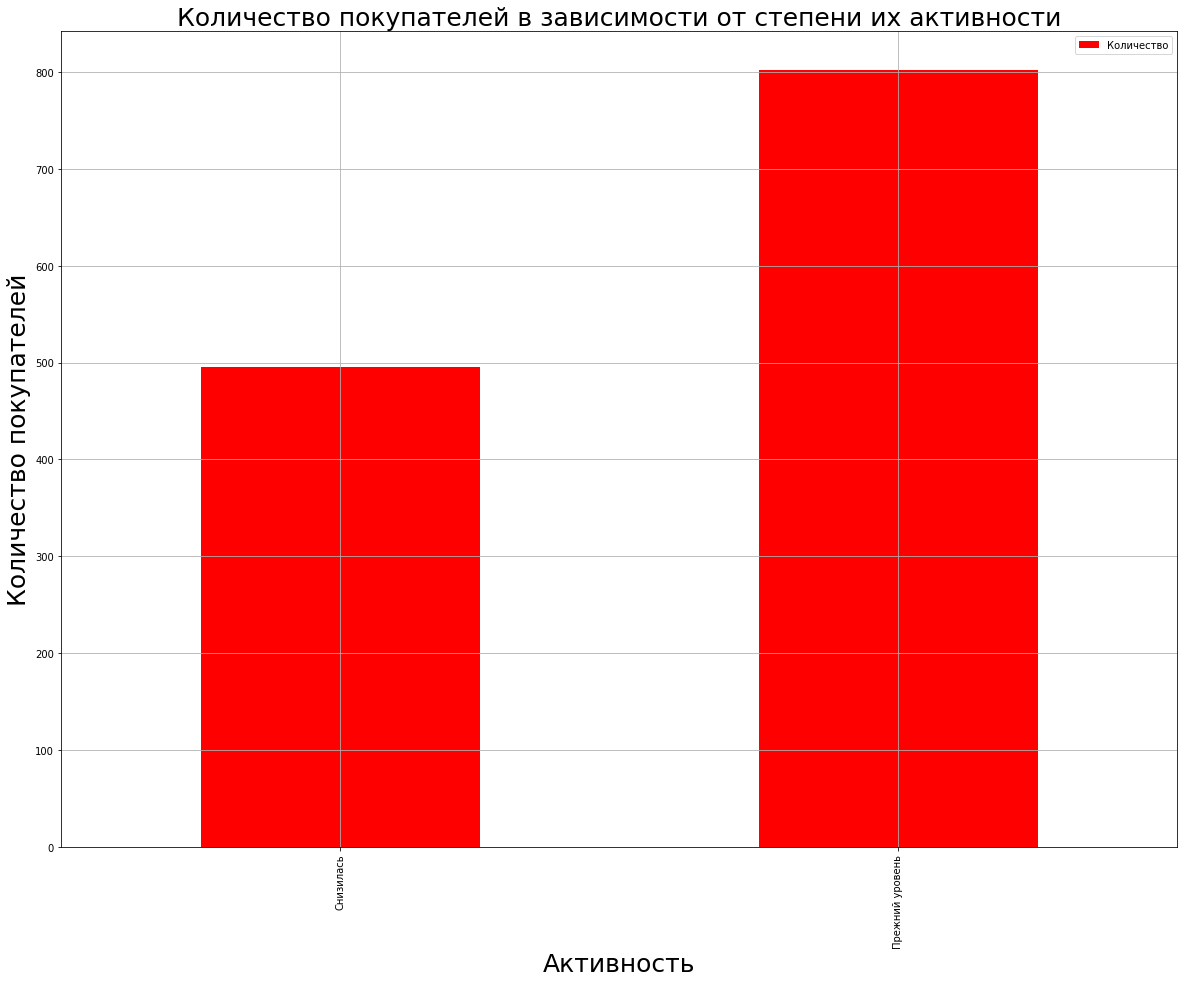

In [38]:
# Диаграмма зависимости количества покупателей от их активности:
df_1.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='red')
plt.title('Количество покупателей в зависимости от степени их активности', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Активность', fontsize=25)
plt.show()

Печально, больше трети покупателей перестали активно закупаться на ресурсе.

In [39]:
# Создание сводной таблицы:
df_2 = market_file.pivot_table(index='Тип сервиса', values='id', aggfunc='count')
df_2.columns = ['Количество']
df_2 = df_2.sort_values(by='Количество', ascending=True)

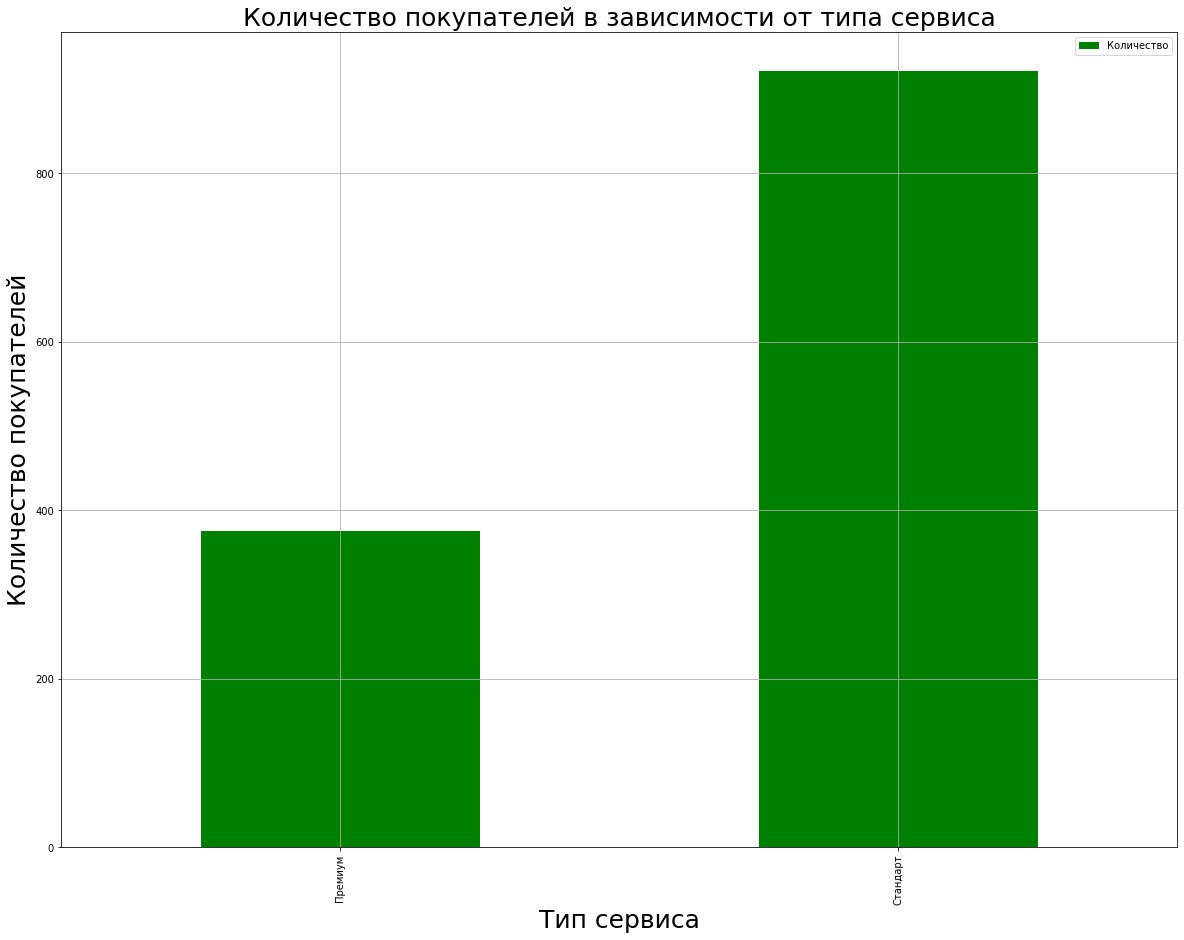

In [40]:
# Диаграмма зависимости количества покупателей от типа сервиса:
df_2.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='green')
plt.title('Количество покупателей в зависимости от типа сервиса', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

Из общего числа покупателей только треть имеет статус "Премиум". Маловато.

In [41]:
# Создание сводной таблицы:
df_3 = market_file.pivot_table(index='Разрешить сообщать', values='id', aggfunc='count')
df_3.columns = ['Количество']
df_3 = df_3.sort_values(by='Количество', ascending=True)

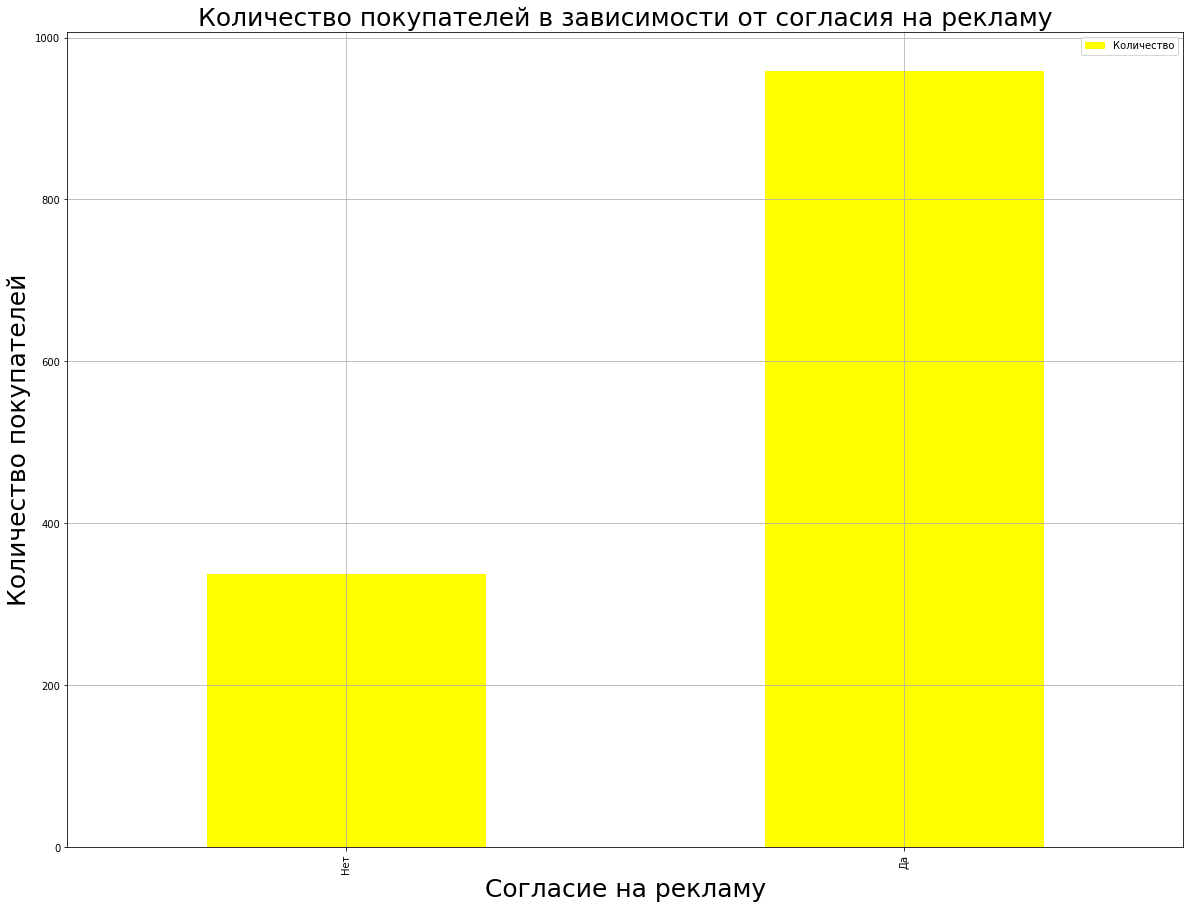

In [42]:
# Диаграмма зависимости количества покупателей от согласия на рекламу:
df_3.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='yellow')
plt.title('Количество покупателей в зависимости от согласия на рекламу', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Согласие на рекламу', fontsize=25)
plt.show()

70% пользователей согласились на рекламную рассылку.

In [43]:
# Создание сводной таблицы:
df_4 = market_file.pivot_table(index='Активность за 6 мес', values='id', aggfunc='count')
df_4.columns = ['Количество']
df_4 = df_4.sort_values(by='Активность за 6 мес', ascending=True)

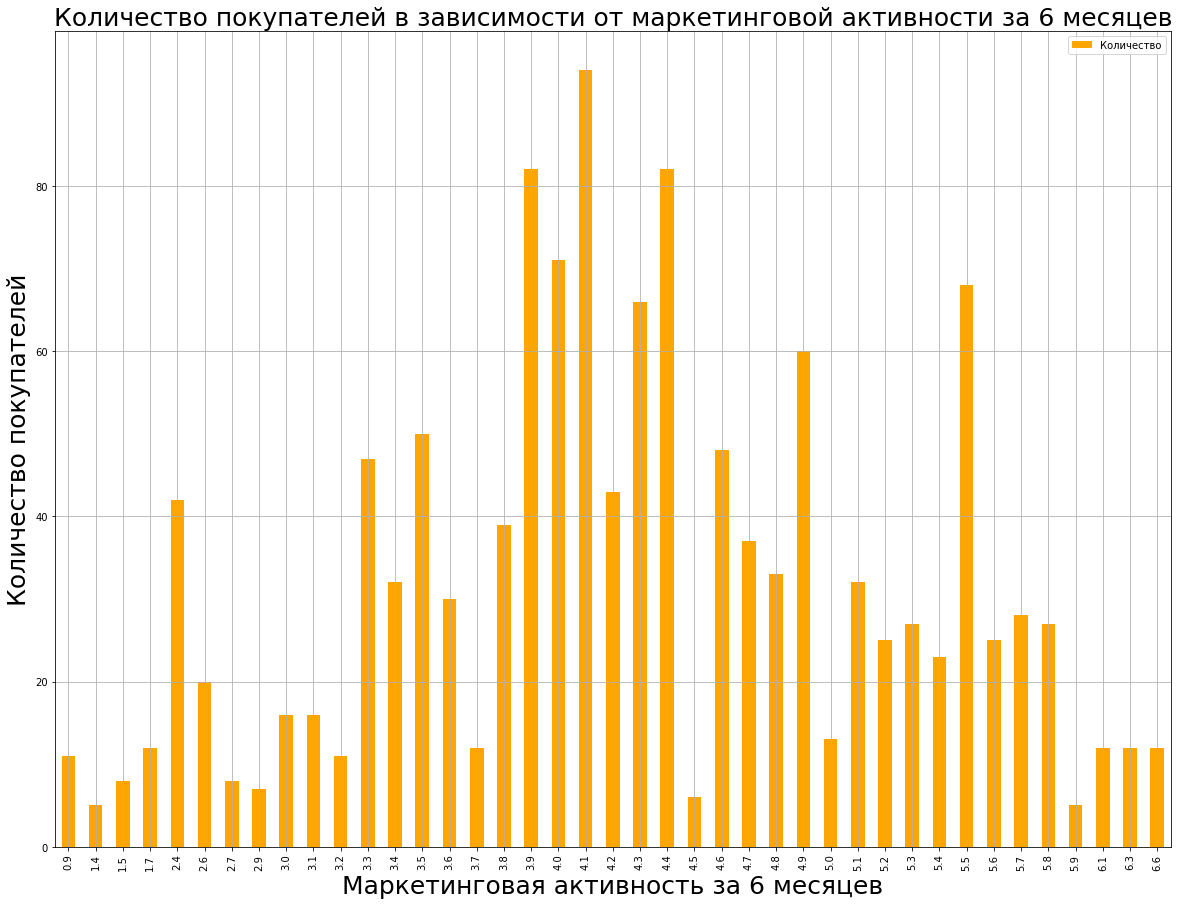

In [44]:
# Диаграмма зависимости количества покупателей от маркетинговой активности за 6 месяцев:
df_4.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='orange')
plt.title('Количество покупателей в зависимости от маркетинговой активности за 6 месяцев', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Маркетинговая активность за 6 месяцев', fontsize=25)
plt.show()

Много выбросов, о нормальном распределении мечтать не приходится. Интеренсо, почему реклама отправляется как попало?

In [45]:
# Создание сводной таблицы:
df_5 = market_file.pivot_table(index='Активность за тек мес', values='id', aggfunc='count')
df_5.columns = ['Количество']
df_5 = df_5.sort_values(by='Активность за тек мес', ascending=True)

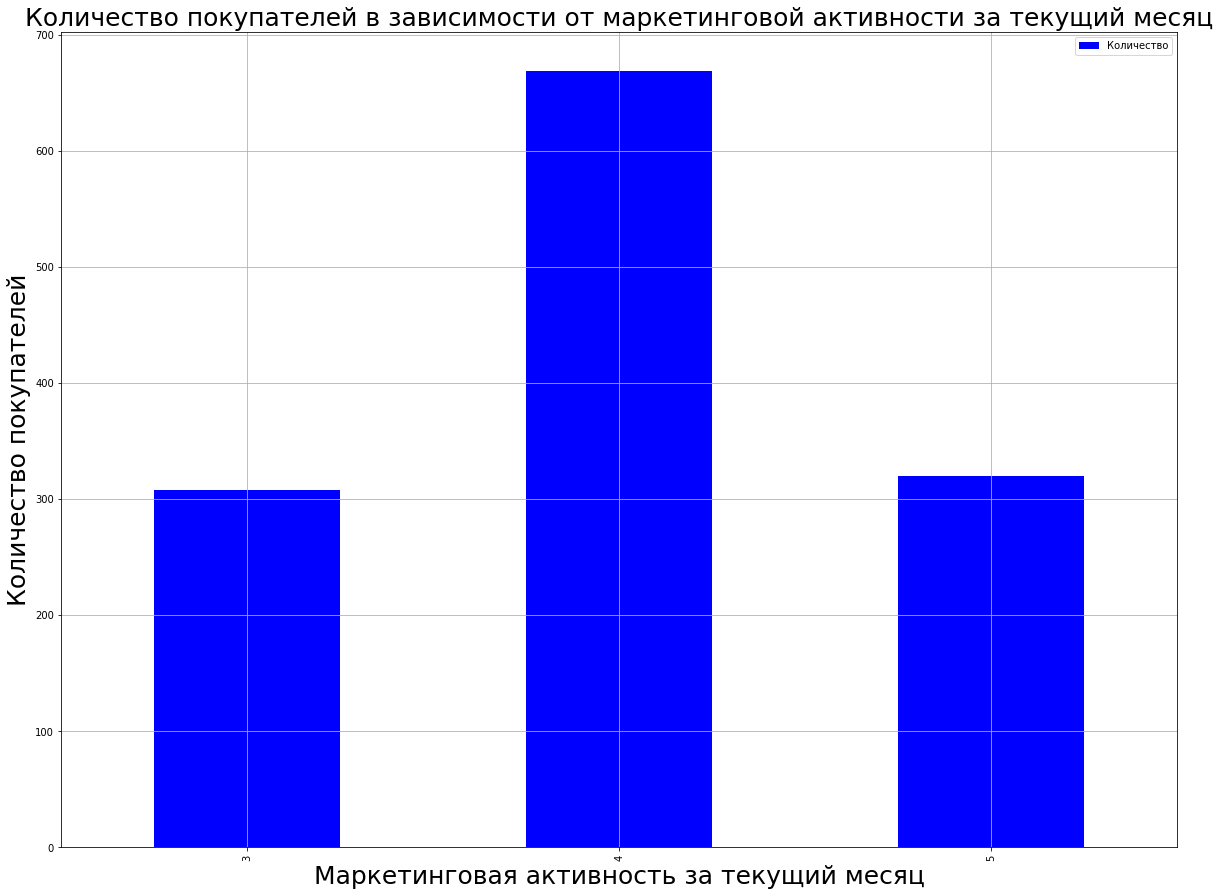

In [46]:
# Диаграмма зависимости количества покупателей от маркетинговой активности за текущий месяц:
df_5.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='blue')
plt.title('Количество покупателей в зависимости от маркетинговой активности за текущий месяц', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Маркетинговая активность за текущий месяц', fontsize=25)
plt.show()

Вот в текущем месяце реклама работает как надо.

In [47]:
# Создание сводной таблицы:
df_7 = market_file.pivot_table(index='Акционные покупки', values='id', aggfunc='count')
df_7.columns = ['Количество']
df_7 = df_7.sort_values(by='Акционные покупки', ascending=True)

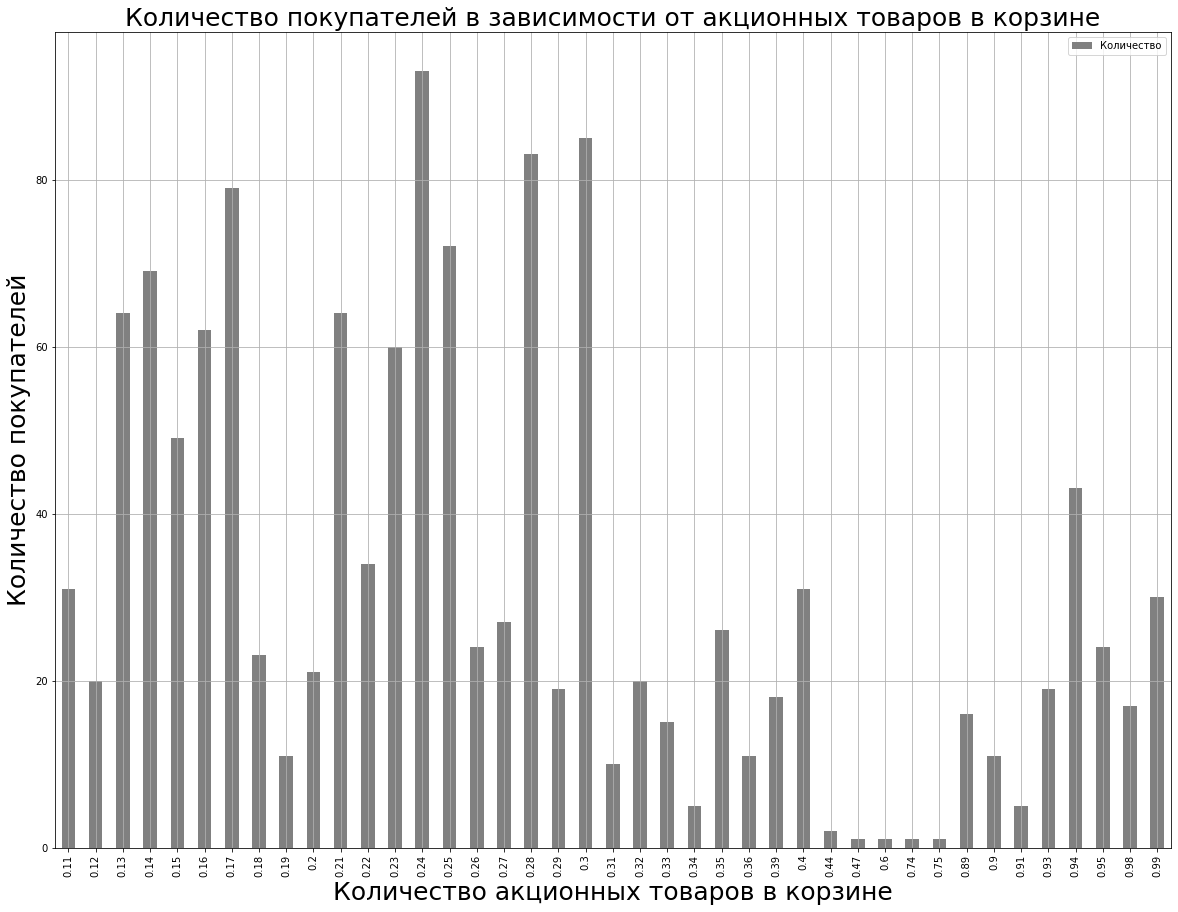

In [48]:
# Диаграмма зависимости количества покупателей от акционных товаров в корзине:
df_7.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='grey')
plt.title('Количество покупателей в зависимости от акционных товаров в корзине', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество акционных товаров в корзине', fontsize=25)
plt.show()

Нормального распределения не наблюдается. Хотя можно заметить, что люди либо редко пользуются акциями (до 40% товаров в корзине), либо очень часто (89%+).

In [49]:
# Создание сводной таблицы:
df_8 = market_file.pivot_table(index='Популярная категория', values='id', aggfunc='count')
df_8.columns = ['Количество']
df_8 = df_8.sort_values(by='Количество', ascending=True)

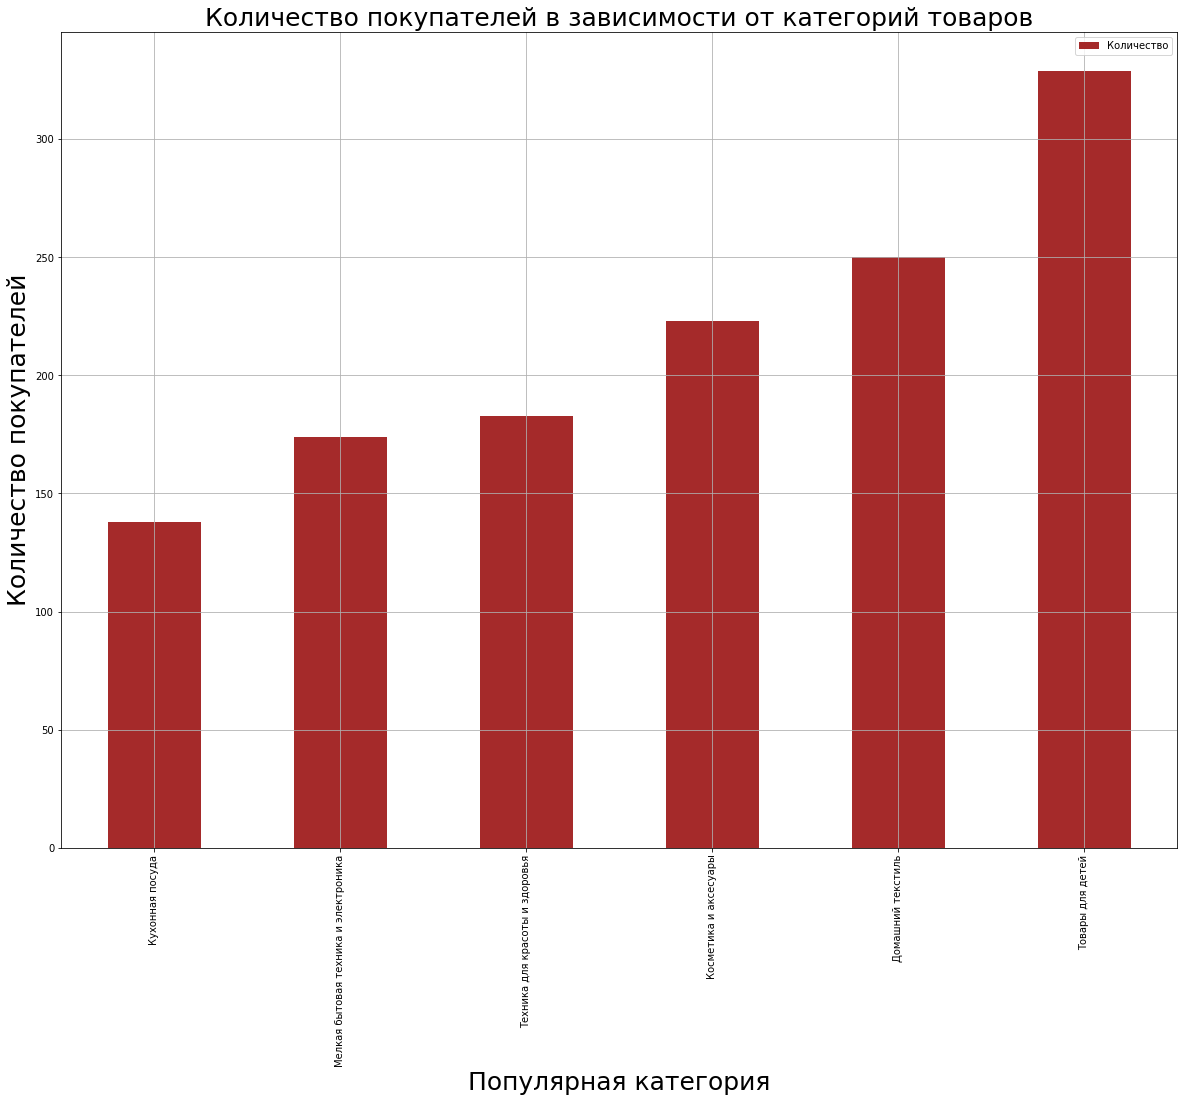

In [50]:
# Диаграмма зависимости количества покупателей от категорий товаров:
df_8.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='brown')
plt.title('Количество покупателей в зависимости от категорий товаров', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Популярная категория', fontsize=25)
plt.show()

Явный лидер - "товары для детей". Остальные имеют популярность немного ниже, без резких перепадов.

In [51]:
# Создание сводной таблицы:
df_9 = market_file.pivot_table(index='Средний просмотр категорий за визит', values='id', aggfunc='count')
df_9.columns = ['Количество']
df_9 = df_9.sort_values(by='Средний просмотр категорий за визит', ascending=True)

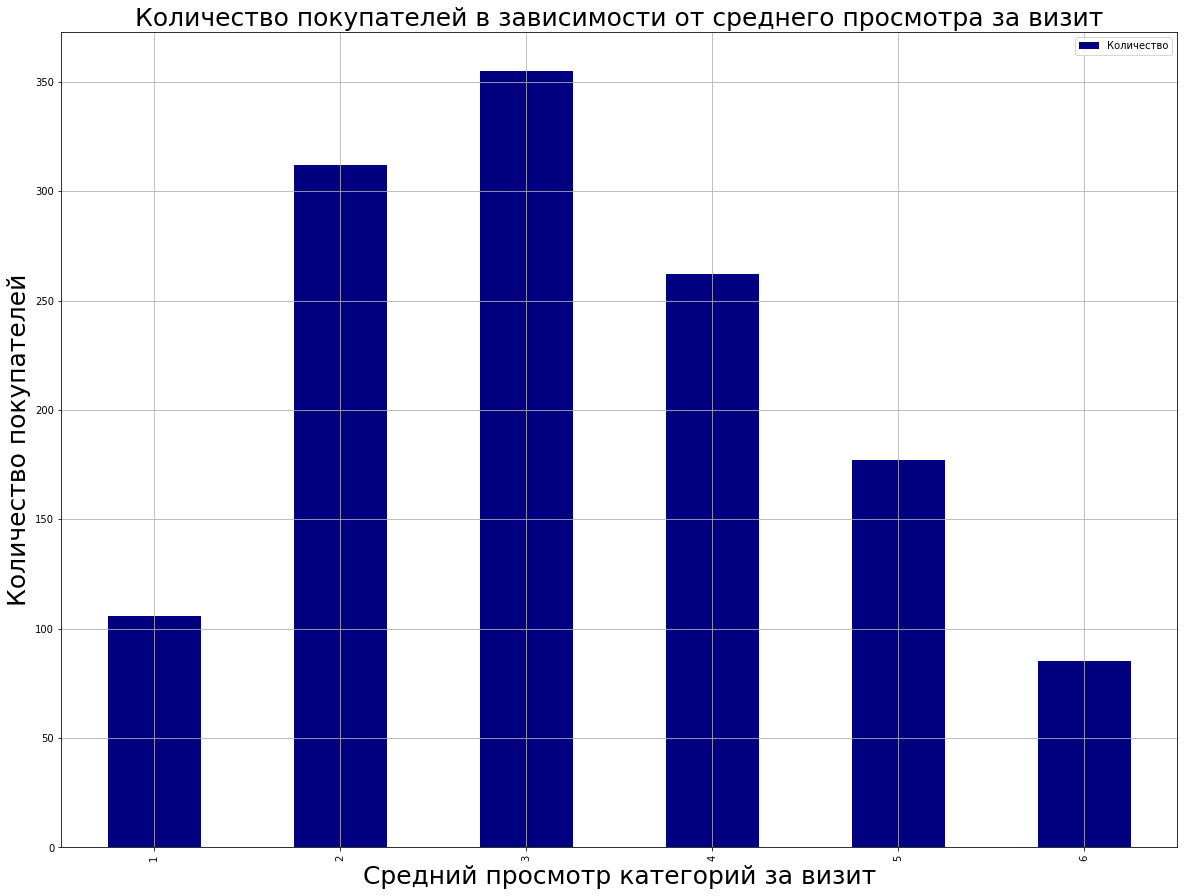

In [52]:
# Диаграмма зависимости количества покупателей от среднего просмотра за визит:
df_9.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='navy')
plt.title('Количество покупателей в зависимости от среднего просмотра за визит', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Средний просмотр категорий за визит', fontsize=25)
plt.show()

В основном люди просматривают по 2-4 категории за раз.

In [53]:
# Создание сводной таблицы:
df_10 = market_file.pivot_table(index='Неоплаченные продукты, штук за квартал', values='id', aggfunc='count')
df_10.columns = ['Количество']
df_10 = df_10.sort_values(by='Неоплаченные продукты, штук за квартал', ascending=True)

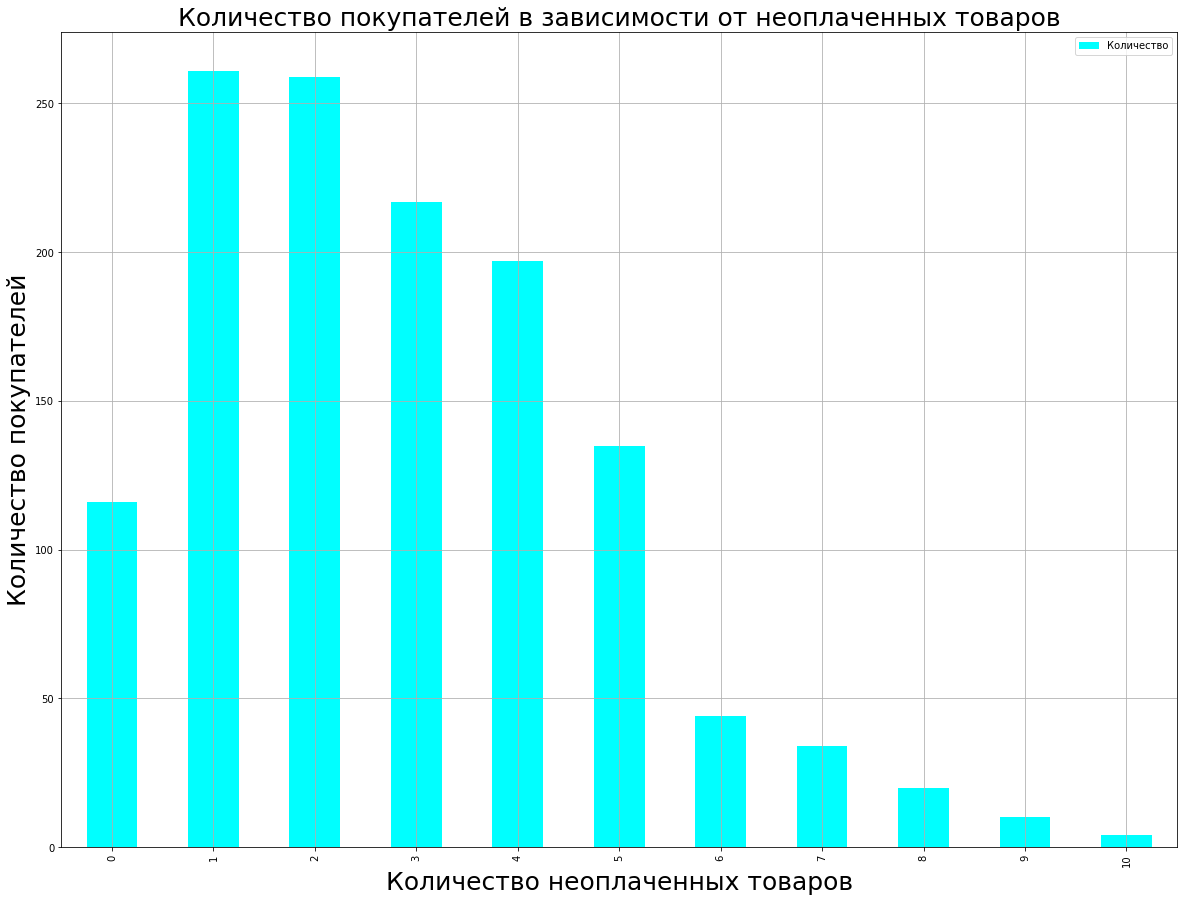

In [54]:
# Диаграмма зависимости количества покупателей от неоплаченных продуктов в корзине:
df_10.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='aqua')
plt.title('Количество покупателей в зависимости от неоплаченных товаров', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество неоплаченных товаров', fontsize=25)
plt.show()

Напоминает нормальное распределение со смещением влево. Пик приходится на 2-4 товара.

In [55]:
# Создание сводной таблицы:
df_11 = market_file.pivot_table(index='Ошибка сервиса', values='id', aggfunc='count')
df_11.columns = ['Количество']
df_11 = df_11.sort_values(by='Ошибка сервиса', ascending=True)

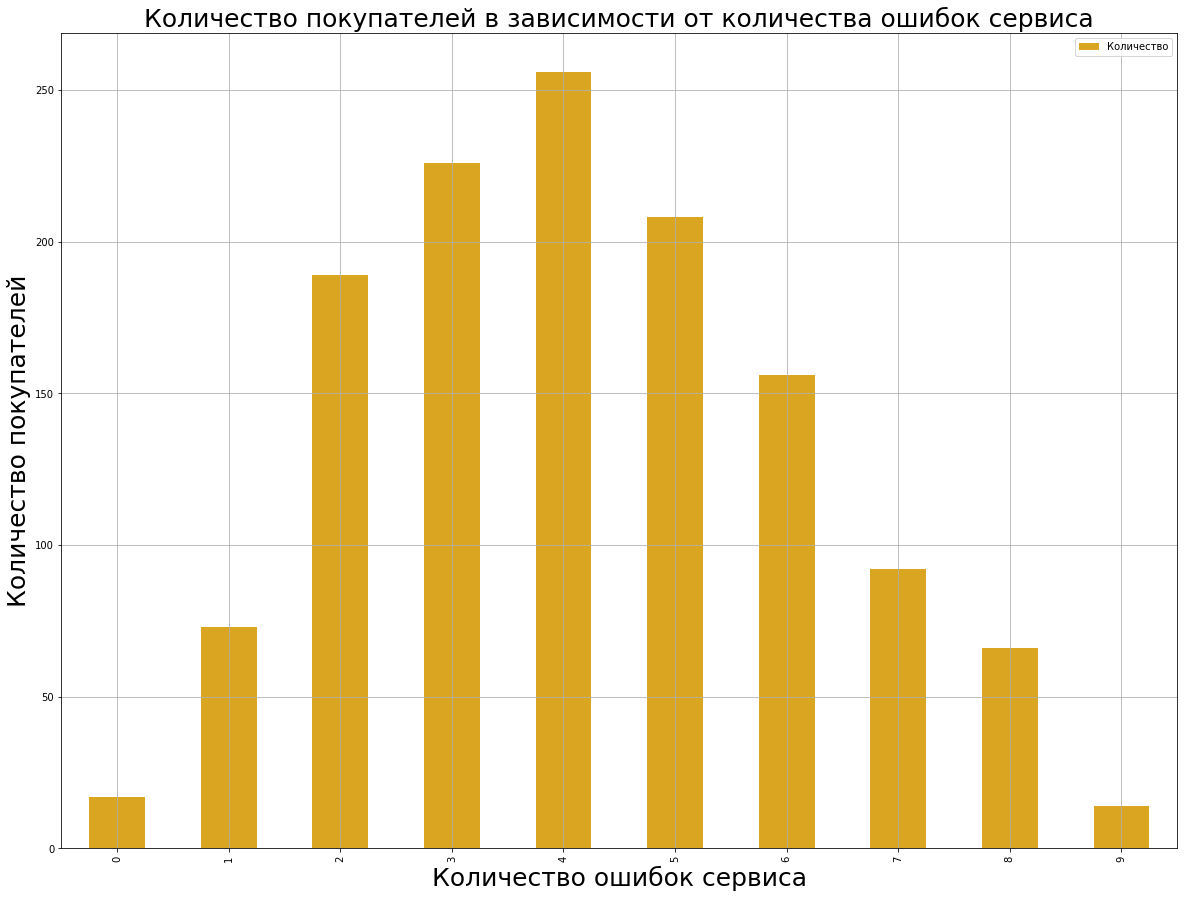

In [56]:
# Диаграмма зависимости количества покупателей от количества ошибок сервиса:
df_11.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='goldenrod')
plt.title('Количество покупателей в зависимости от количества ошибок сервиса', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество ошибок сервиса', fontsize=25)
plt.show()

Наблюдаем нормальное распределение с пиком в 4 ошибки.

In [57]:
# Создание сводной таблицы:
df_12 = market_file.pivot_table(index='Страниц за визит', values='id', aggfunc='count')
df_12.columns = ['Количество']
df_12 = df_12.sort_values(by='Страниц за визит', ascending=True)

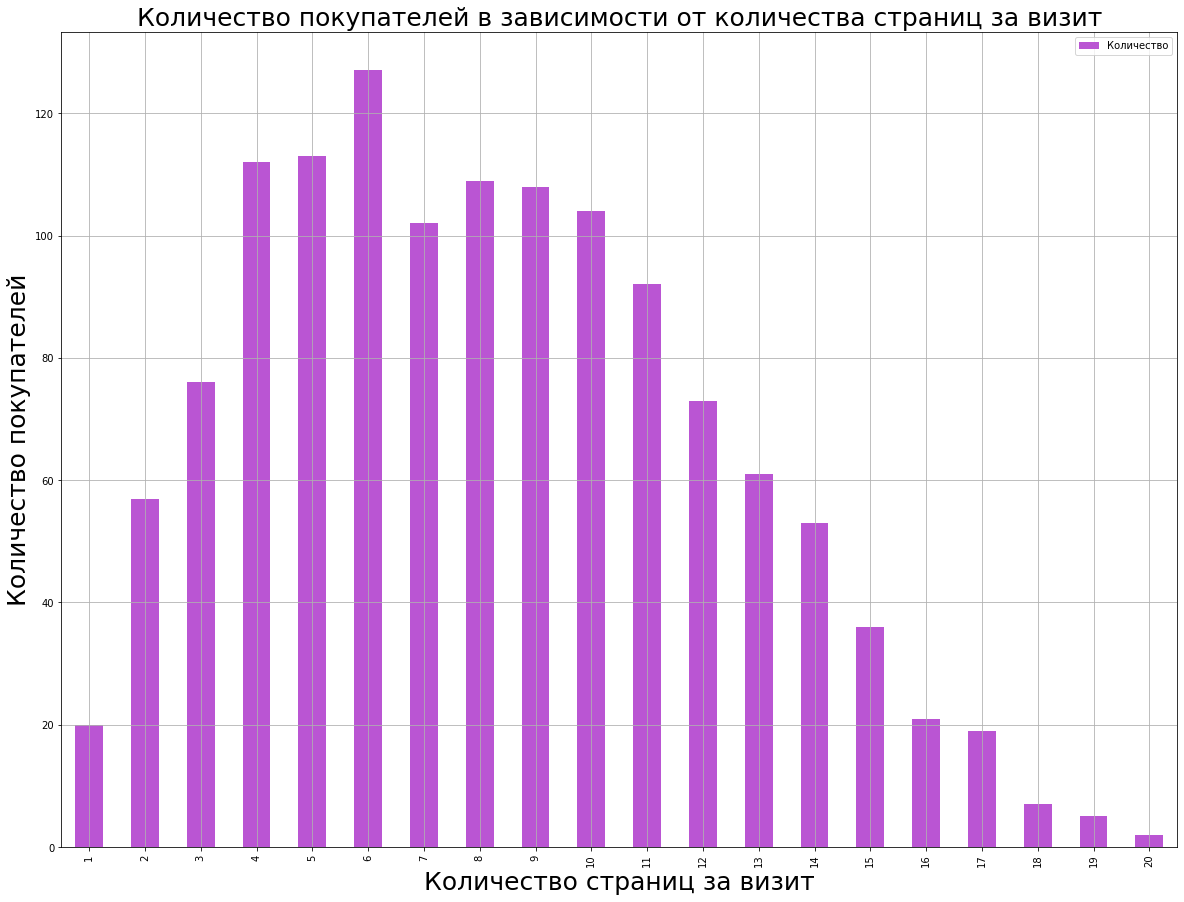

In [58]:
# Диаграмма зависимости количества покупателей от количества страниц за визит:
df_12.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='mediumorchid')
plt.title('Количество покупателей в зависимости от количества страниц за визит', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество страниц за визит', fontsize=25)
plt.show()

Распределение Пуассона с небольшими выбросами слева. Явный пик на 6 страницах.

##### Промежуточный вывод:
После рассмотрения гистограмм по основной таблице можно сказать о следующем: 
  - больше трети покупателей перестали активно закупаться на ресурсе;
  - из общего числа покупателей только треть имеет статус "Премиум";
  - 70% пользователей согласились на рекламную рассылку;
  - люди либо редко пользуются акциями (до 40% товаров в корзине), либо очень часто (89%+);
  - наибольшая популярность у категории "товары для детей", остальные имеют популярность немного ниже, без резких перепадов;
  - в основном люди просматривают по 2-4 категории за раз.
  
Нормальное распределение наблюдается у следующих величин: "страниц за визит", "ошибки сервиса", "категорий за визит", "Неоплаченные продукты".

Распределение прибыли из датафрейма "money" также является нормальным. В распределении минут, проведённых на сайте из "market_time" имеются выбросы.

#### Вывод:
В ходе исследовательского анализа данных обнаружили 3 "новеньких" - покупатели, которые совершали покупки только в текущем месяце. Для дальнейшего анализа данные о них бесполезны, поэтому удалили их из всех таблиц.

В ходе анализа boxplot'ов количественных данных всех таблиц был выявлен и удалён один явный выброс из "market_money"; остальные данные вопросов не вызывают.

После рассмотрения гистограмм по основной таблице можно сказать о следующем: 
  - больше трети покупателей перестали активно закупаться на ресурсе;
  - из общего числа покупателей только треть имеет статус "Премиум";
  - 70% пользователей согласились на рекламную рассылку;
  - люди либо редко пользуются акциями (до 40% товаров в корзине), либо очень часто (89%+);
  - наибольшая популярность у категории "товары для детей", остальные имеют популярность немного ниже, без резких перепадов;
  - в основном люди просматривают по 2-4 категории за раз.
  
Нормальное распределение наблюдается у следующих величин: "страниц за визит", "ошибки сервиса", "категорий за визит", "Неоплаченные продукты".

Распределение прибыли из датафрейма "money" также является нормальным. В распределении минут, проведённых на сайте из "market_time" имеются выбросы.

Данные проанализированы и готовы к дальнейшим преобразованиям.

### Объединение таблиц

Настало время объединить таблицы "market_file", "market_money", "market_time". При объединении для каждого периода (предпредыдущий, предыдущий, текущий месяц) создадим отдельный столбец.

In [59]:
# Преобразуем таблицу market_money:
pivot = pd.pivot_table(market_money, index=['id'], columns=['Период'])
pivot.columns = ['Выручка в предпредыдущем месяце', 'Выручка в предыдущем месяце', 'Выручка в текущем месяце']
display(pivot.head())

,Выручка в предпредыдущем месяце,Выручка в предыдущем месяце,Выручка в текущем месяце
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5


In [60]:
# Первое объединение:
market_1 = market_file.merge(pivot, on="id")
display(market_1.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в предыдущем месяце,Выручка в текущем месяце
0,215349,Снизилась,Премиум,Да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6
1,215350,Снизилась,Стандарт,Нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4
2,215351,Снизилась,Стандарт,Да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4
3,215352,Снизилась,Стандарт,Нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5
4,215353,Снизилась,Стандарт,Да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5


In [61]:
# Преобразуем таблицу market_time:
pivot_1 = pd.pivot_table(market_time, index=['id'], columns=['Период'])
pivot_1.columns = ['Минут в предыдущем месяце', 'Минут в текущем месяце']
display(pivot_1.head())

,Минут в предыдущем месяце,Минут в текущем месяце
id,,
215349,12.0,10.0
215350,8.0,13.0
215351,11.0,13.0
215352,8.0,11.0
215353,10.0,10.0


In [62]:
# Второе объединение:
market = market_1.merge(pivot_1, on="id")
display(market.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в предыдущем месяце,Выручка в текущем месяце,Минут в предыдущем месяце,Минут в текущем месяце
0,215349,Снизилась,Премиум,Да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12.0,10.0
1,215350,Снизилась,Стандарт,Нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8.0,13.0
2,215351,Снизилась,Стандарт,Да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11.0,13.0
3,215352,Снизилась,Стандарт,Нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8.0,11.0
4,215353,Снизилась,Стандарт,Да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10.0,10.0


Проверим итоговую таблицу на наличие пропусков.

In [63]:
# Проверка на пропуски:
market.isna().sum()

id                                        0
Покупательская активность                 0
Тип сервиса                               0
Разрешить сообщать                        0
Активность за 6 мес                       0
Активность за тек мес                     0
Длительность                              0
Акционные покупки                         0
Популярная категория                      0
Средний просмотр категорий за визит       0
Неоплаченные продукты, штук за квартал    0
Ошибка сервиса                            0
Страниц за визит                          0
Выручка в предпредыдущем месяце           0
Выручка в предыдущем месяце               0
Выручка в текущем месяце                  1
Минут в предыдущем месяце                 0
Минут в текущем месяце                    0
dtype: int64

In [64]:
# Обрабатываем найденный пропуск:
market['Выручка в текущем месяце'] = market['Выручка в текущем месяце'].fillna(market['Выручка в текущем месяце'].median())
market.isna().sum()

id                                        0
Покупательская активность                 0
Тип сервиса                               0
Разрешить сообщать                        0
Активность за 6 мес                       0
Активность за тек мес                     0
Длительность                              0
Акционные покупки                         0
Популярная категория                      0
Средний просмотр категорий за визит       0
Неоплаченные продукты, штук за квартал    0
Ошибка сервиса                            0
Страниц за визит                          0
Выручка в предпредыдущем месяце           0
Выручка в предыдущем месяце               0
Выручка в текущем месяце                  0
Минут в предыдущем месяце                 0
Минут в текущем месяце                    0
dtype: int64

#### Вывод:
Объединение основных таблиц прошло успешно. Теперь имеем два датафрейма: "market" и "money". Данные полностью готовы для корреляционного анализа и обучения моделей.

### Корреляционный анализ

Переходим к корреляционному анализу данных. До нас признаки уже были разбиты на отдельные группы. Посмотрим на них.

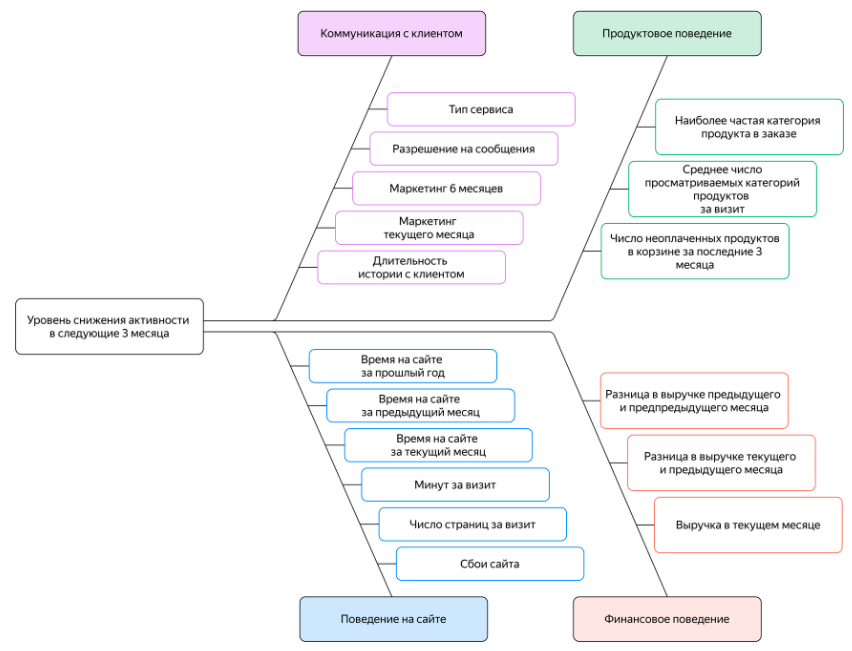

Целевым признаком является покупательская активность. Диаграммы рассеяния построить не получится, поэтому перейдём к расчёту коэффициентов корреляции. Для всех величин используем корреляцию Спирмана.

In [65]:
print('Корреляция с типом сервиса (коэффициент):', spearmanr(market['Тип сервиса'], market['Покупательская активность'])[0])
print('Корреляция с типом сервиса (p-значение):', spearmanr(market['Тип сервиса'], market['Покупательская активность'])[1])
print()
print('Корреляция с разрешением на рекламу (коэффициент):', spearmanr(market['Разрешить сообщать'], market['Покупательская активность'])[0])
print('Корреляция с разрешением на рекламу (p-значение):', spearmanr(market['Разрешить сообщать'], market['Покупательская активность'])[1])
print()
print('Корреляция с маркет активность за 6 месяцев (коэффициент):', spearmanr(market['Активность за 6 мес'], market['Покупательская активность'])[0])
print('Корреляция с маркет активность за 6 месяцев (p-значение):', spearmanr(market['Активность за 6 мес'], market['Покупательская активность'])[1])
print()
print('Корреляция с маркет активность за тек месяцев (коэффициент):', spearmanr(market['Активность за тек мес'], market['Покупательская активность'])[0])
print('Корреляция с маркет активность за тек месяцев (p-значение):', spearmanr(market['Активность за тек мес'], market['Покупательская активность'])[1])
print()
print('Корреляция с длительностью регистрации (коэффициент):', spearmanr(market['Длительность'], market['Покупательская активность'])[0])
print('Корреляция с длительностью регистрации (p-значение):', spearmanr(market['Длительность'], market['Покупательская активность'])[1])
print()
print('Корреляция с акционными покупками (коэффициент):', spearmanr(market['Акционные покупки'], market['Покупательская активность'])[0])
print('Корреляция с акционными покупками (p-значение):', spearmanr(market['Акционные покупки'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством категорий за визит (коэффициент):', spearmanr(market['Средний просмотр категорий за визит'], market['Покупательская активность'])[0])
print('Корреляция с количеством категорий за визит (p-значение):', spearmanr(market['Средний просмотр категорий за визит'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством неоплаченных товаров (коэффициент):', spearmanr(market['Неоплаченные продукты, штук за квартал'], market['Покупательская активность'])[0])
print('Корреляция с количеством неоплаченных товаров (p-значение):', spearmanr(market['Неоплаченные продукты, штук за квартал'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством ошибок сервиса (коэффициент):', spearmanr(market['Ошибка сервиса'], market['Покупательская активность'])[0])
print('Корреляция с количеством ошибок сервиса (p-значение):', spearmanr(market['Ошибка сервиса'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством страниц за визит (коэффициент):', spearmanr(market['Страниц за визит'], market['Покупательская активность'])[0])
print('Корреляция с количеством страниц за визит (p-значение):', spearmanr(market['Страниц за визит'], market['Покупательская активность'])[1])
print()
print('Корреляция с выручкой в предпредыдущий месяц (коэффициент):', spearmanr(market['Выручка в предпредыдущем месяце'], market['Покупательская активность'])[0])
print('Корреляция с выручкой в предпредыдущий месяц (p-значение):', spearmanr(market['Выручка в предпредыдущем месяце'], market['Покупательская активность'])[1])
print()
print('Корреляция с выручкой в предыдущий месяц (коэффициент):', spearmanr(market['Выручка в предыдущем месяце'], market['Покупательская активность'])[0])
print('Корреляция с выручкой в предыдущий месяц (p-значение):', spearmanr(market['Выручка в предыдущем месяце'], market['Покупательская активность'])[1])
print()
print('Корреляция с выручкой в текущем месяце (коэффициент):', spearmanr(market['Выручка в текущем месяце'], market['Покупательская активность'])[0])
print('Корреляция с выручкой в текущем месяце (p-значение):', spearmanr(market['Выручка в текущем месяце'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством минут в пред. месяце (коэффициент):', spearmanr(market['Минут в предыдущем месяце'], market['Покупательская активность'])[0])
print('Корреляция с количеством минут в пред. месяце (p-значение):', spearmanr(market['Минут в предыдущем месяце'], market['Покупательская активность'])[1])
print()
print('Корреляция с количеством минут в тек. месяце (коэффициент):', spearmanr(market['Минут в текущем месяце'], market['Покупательская активность'])[0])
print('Корреляция с количеством минут в тек. месяце (p-значение):', spearmanr(market['Минут в текущем месяце'], market['Покупательская активность'])[1])
print()

Корреляция с типом сервиса (коэффициент): -0.09060550567090014
Корреляция с типом сервиса (p-значение): 0.0010883545701347206

Корреляция с разрешением на рекламу (коэффициент): -0.007222872949087015
Корреляция с разрешением на рекламу (p-значение): 0.7949591889739328

Корреляция с маркет активность за 6 месяцев (коэффициент): -0.38285087233285103
Корреляция с маркет активность за 6 месяцев (p-значение): 1.5502567169419656e-46

Корреляция с маркет активность за тек месяцев (коэффициент): -0.0035014198918847765
Корреляция с маркет активность за тек месяцев (p-значение): 0.8997489121460667

Корреляция с длительностью регистрации (коэффициент): 0.062120233357588
Корреляция с длительностью регистрации (p-значение): 0.0252736109388182

Корреляция с акционными покупками (коэффициент): 0.4705972790170225
Корреляция с акционными покупками (p-значение): 1.8864943740917153e-72

Корреляция с количеством категорий за визит (коэффициент): -0.38317905404440905
Корреляция с количеством категорий за в

Итак, смотрим на p-значения. Если оно меньше 0,05, то корреляция является статистически значимой. Из всех признаков этот порог не прошли два: разрешение на рекламу, маркетинговая активность за текущий месяц и выручка за предыдущий месяц.

Взглянем теперь на графики scatter для количественных величин.

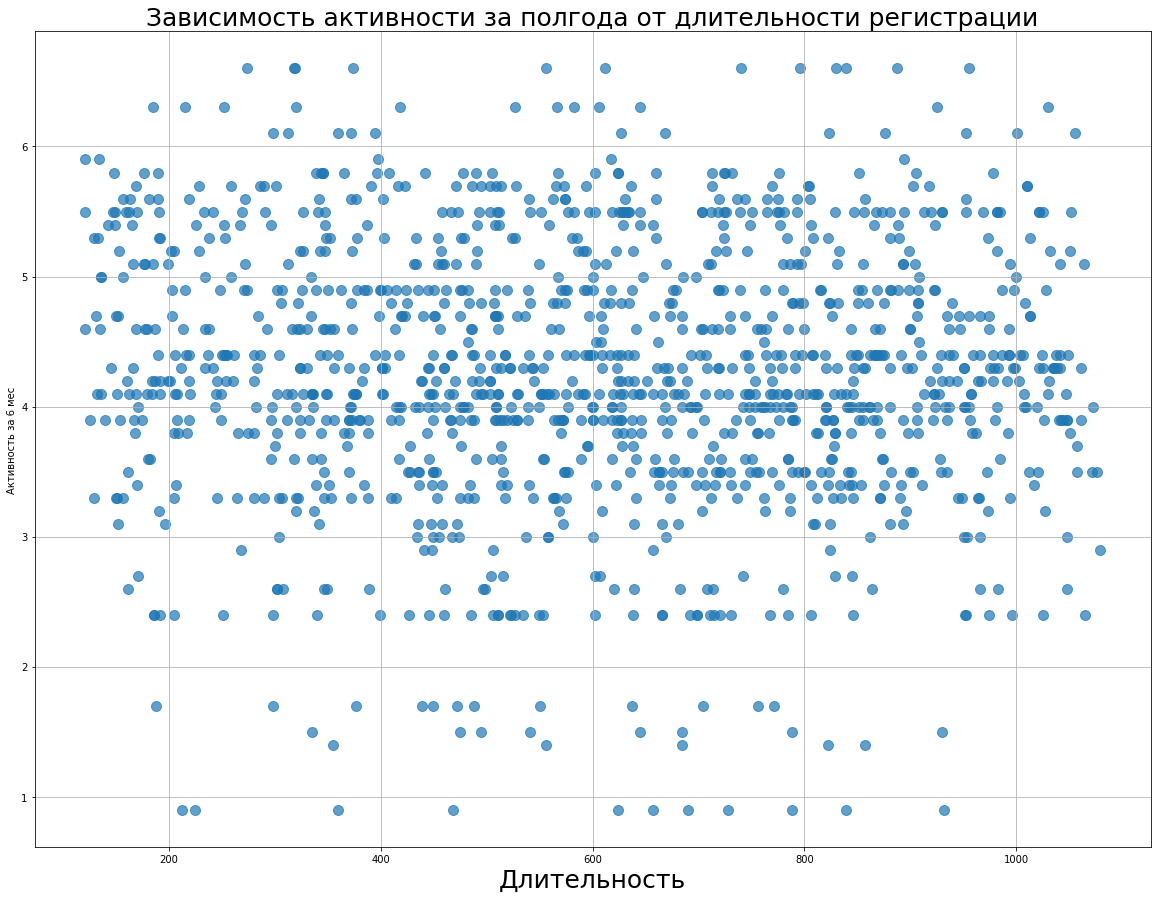

In [66]:
# Диаграмма рассеяния:
market.plot.scatter(x='Длительность', y='Активность за 6 мес', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость активности за полгода от длительности регистрации', fontsize=25)
plt.xlabel('Длительность', fontsize=25)
plt.show()

Линейностью и не пахнет.

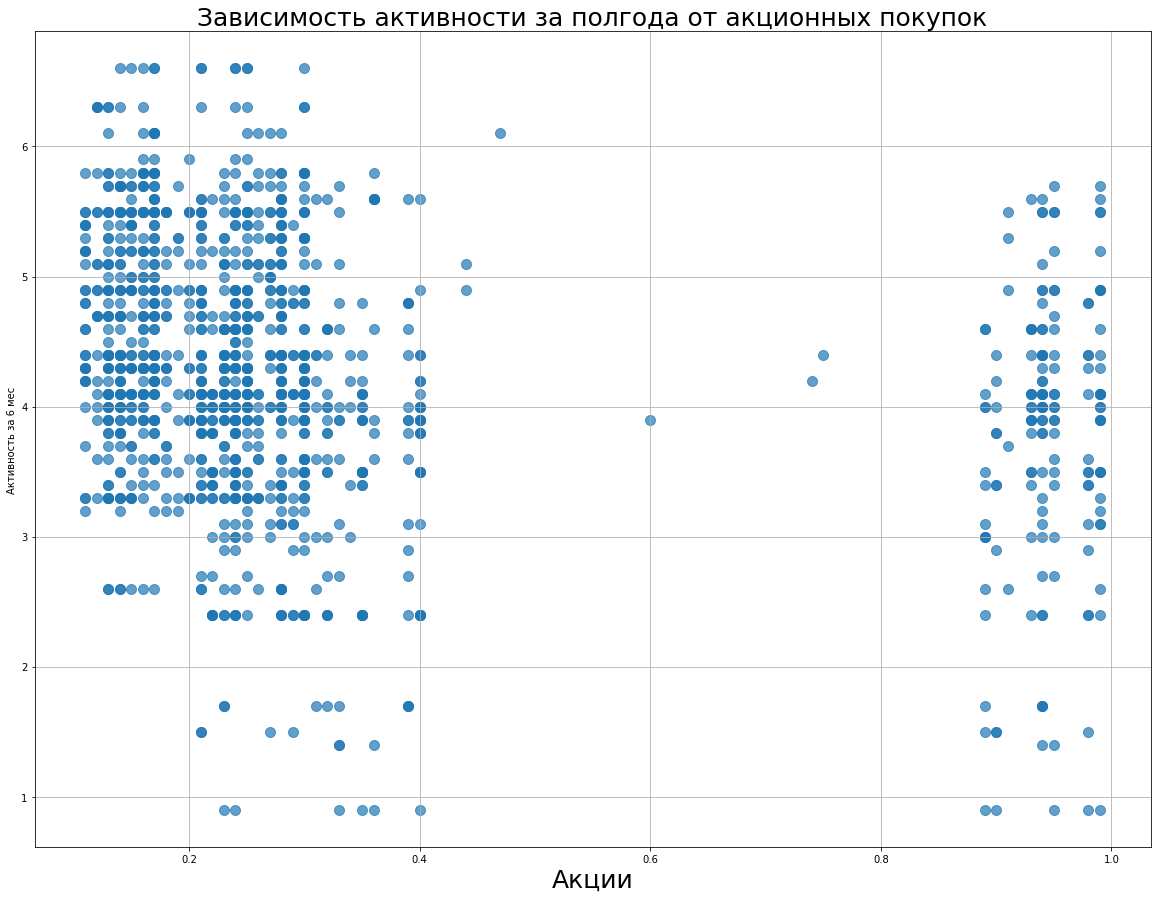

In [67]:
# Диаграмма рассеяния:
market.plot.scatter(x='Акционные покупки', y='Активность за 6 мес', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость активности за полгода от акционных покупок', fontsize=25)
plt.xlabel('Акции', fontsize=25)
plt.show()

Активность пользователей не зависит линейно от акционных товаров.

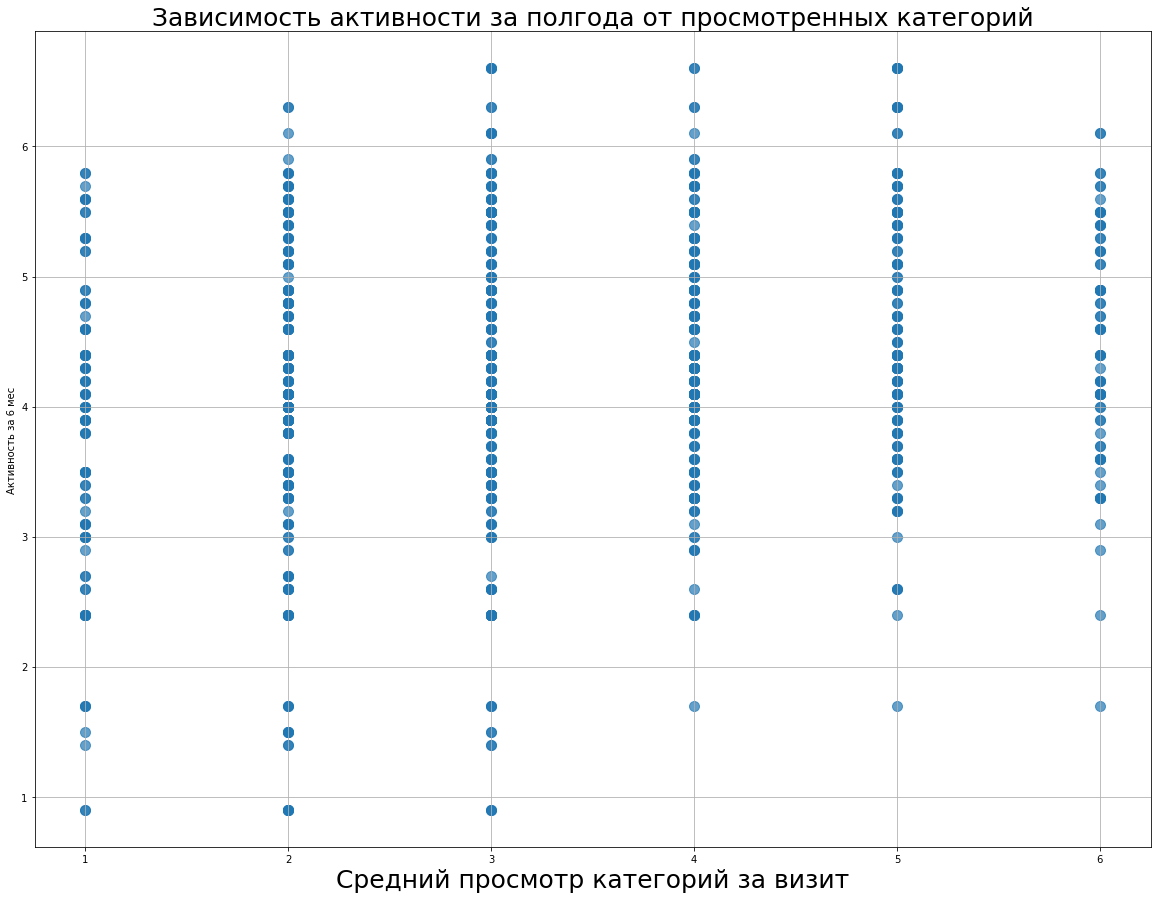

In [68]:
# Диаграмма рассеяния:
market.plot.scatter(x='Средний просмотр категорий за визит', y='Активность за 6 мес', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость активности за полгода от просмотренных категорий', fontsize=25)
plt.xlabel('Средний просмотр категорий за визит', fontsize=25)
plt.show()

Активность выше у тех, кто смотрит по 3-5 категорий. Линейной зависимости нет.

Сравнивать все величины друг с другом большого смысла нет, хватит уже рассмотренных. Взглянем на корреляцию выручек и минут за разные периоды.

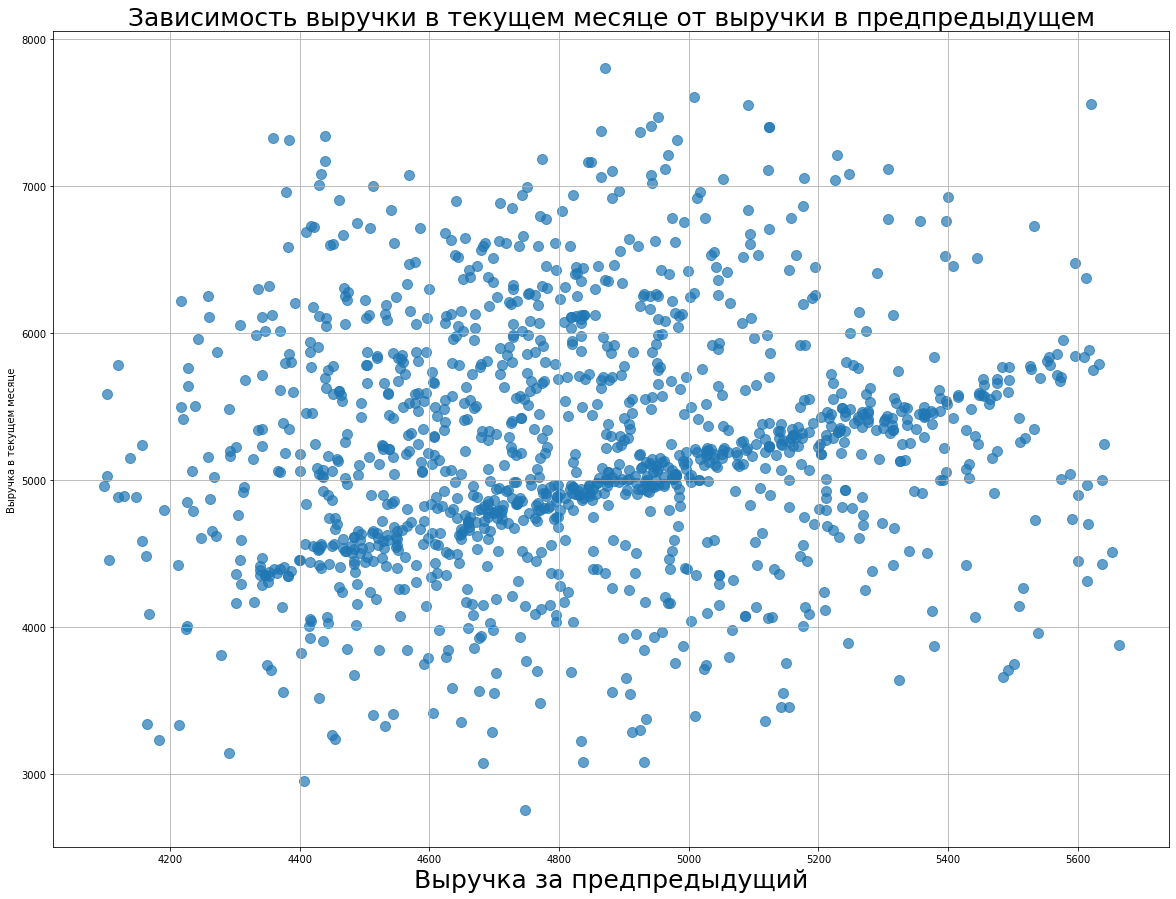

In [69]:
# Диаграмма рассеяния:
market.plot.scatter(x='Выручка в предпредыдущем месяце', y='Выручка в текущем месяце', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость выручки в текущем месяце от выручки в предпредыдущем', fontsize=25)
plt.xlabel('Выручка за предпредыдущий', fontsize=25)
plt.show()

Достаточно сильная линейная связь. Логически понятно, что так и должно быть.

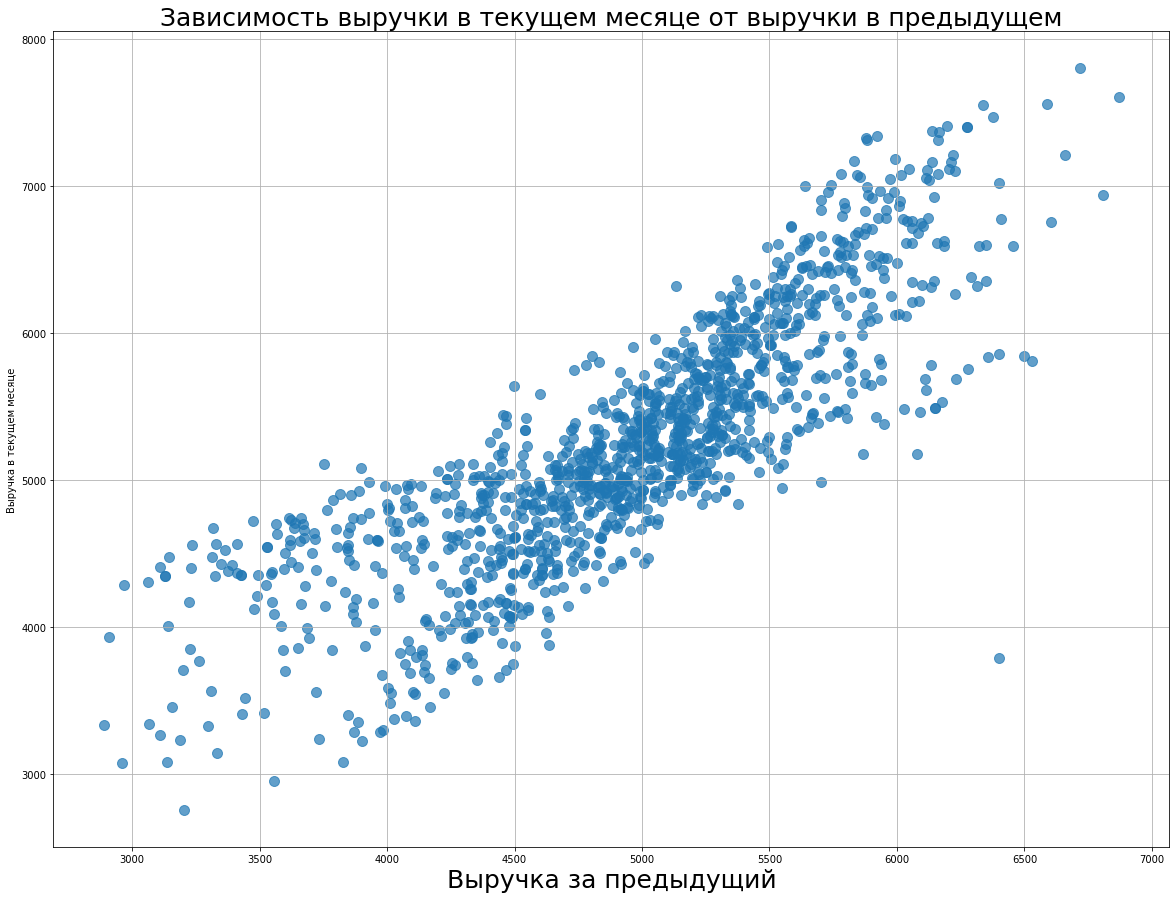

In [70]:
# Диаграмма рассеяния:
market.plot.scatter(x='Выручка в предыдущем месяце', y='Выручка в текущем месяце', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость выручки в текущем месяце от выручки в предыдущем', fontsize=25)
plt.xlabel('Выручка за предыдущий', fontsize=25)
plt.show()

Линейная зависимость стала ещё сильнее. Посчитаем коэффициенты корреляции Пирсона для выручек.

In [71]:
# Коэффициенты корреляции:
print('Зависимость от предпредыдущего:', market['Выручка в предпредыдущем месяце'].corr(market['Выручка в текущем месяце']))
print('Зависимость от предыдущего:', market['Выручка в предыдущем месяце'].corr(market['Выручка в текущем месяце']))

Зависимость от предпредыдущего: 0.12162375375074591
Зависимость от предыдущего: 0.8381789832104123


Значение и правда весьма высоко. Учитывая, что выручка за предыдущий месяц не коррелирует с целевым признаком, удалим этот столбец, чтобы устранить мультиколлинеарность.

In [72]:
# Удаление столбца:
market = market.drop('Выручка в предыдущем месяце', axis=1)

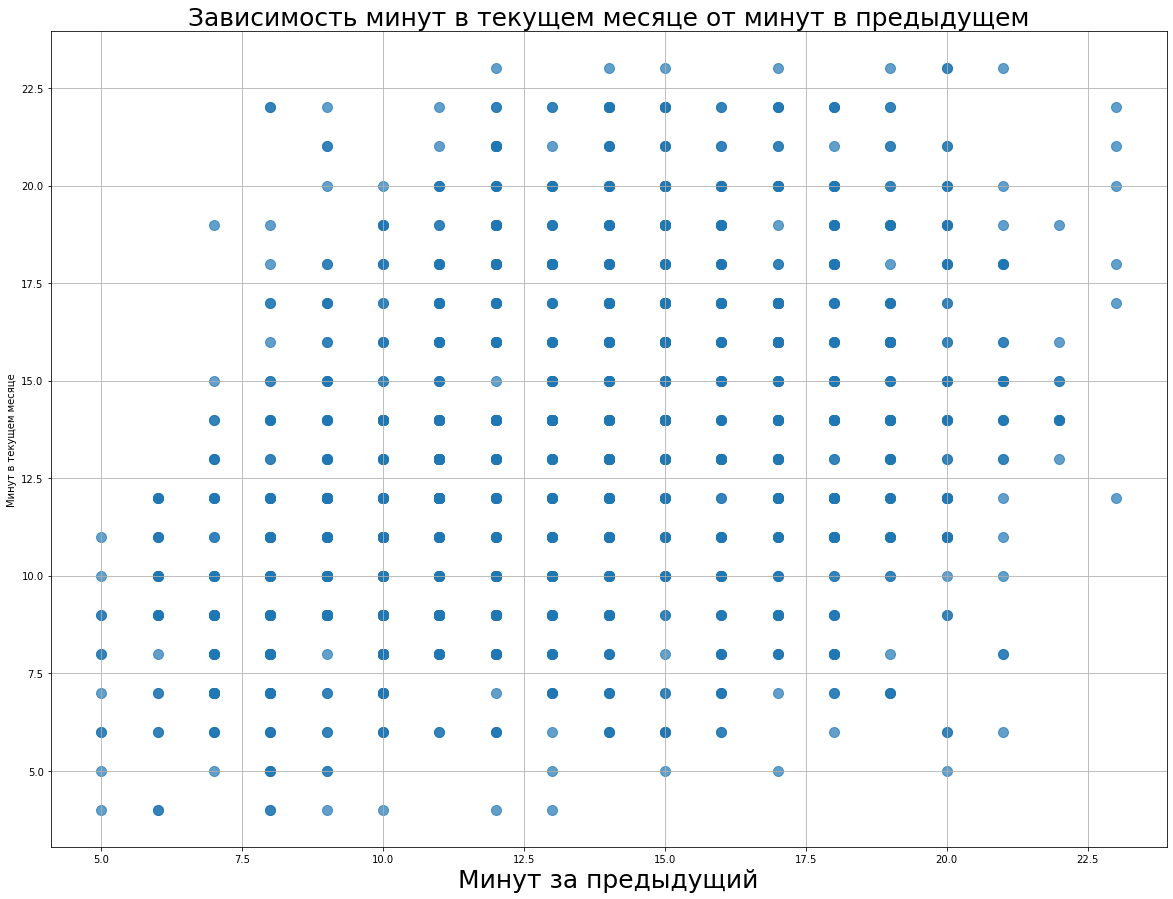

In [73]:
# Диаграмма рассеяния:
market.plot.scatter(x='Минут в предыдущем месяце', y='Минут в текущем месяце', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Зависимость минут в текущем месяце от минут в предыдущем', fontsize=25)
plt.xlabel('Минут за предыдущий', fontsize=25)
plt.show()

In [74]:
print('Зависимость минут от предпредыдущего:', market['Минут в предыдущем месяце'].corr(market['Минут в текущем месяце']))

Зависимость минут от предпредыдущего: 0.34939947174905106


Тут бояться нечего.

#### Вывод:
В ходе корреляционного анализа были посчитаны коэффициенты корреляции Спирмана для всех параметров в итоговой таблице "market". Они показали, что два признака не являются статистически значимыми, будет повод сравнить предсказания моделей с ними и без. Никакой признак не обладает сильной линейной связью с целевым, значимыми можно назвать только 4 из них.

Мультиколлинеарность была обнаружена между выручками за текущий и предыдущий месяцы. Так как выручка за предыдущий месяц статистически не значима для целевого признака, удалили данный столбец. 

Данные готовы для обучения моделей.

### Использование пайплайнов

Теперь подготовим 4 модели для прогнозирования: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC. Создадим единый пайплайн для всех моделей и по результатам его работы выберем лучшую для дальнейших предсказаний.

Выполним подготовку данных для создания пайплайна.

In [75]:
# Задаём новую индексацию:
market = market.set_index('id')

In [76]:
# Задаём константы:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Создаём тренировочную и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(
    market.drop('Покупательская активность', axis=1),
    market['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market['Покупательская активность'])

# Закодируем целевой признак:
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

display(X_train.head())

,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в текущем месяце,Минут в предыдущем месяце,Минут в текущем месяце
id,,,,,,,,,,,,,,,
215858,Стандарт,Да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,4347.0,6014.2,20.0,6.0
215361,Стандарт,Да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,4597.0,3789.7,11.0,13.0
215884,Стандарт,Да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4626.0,3798.4,13.0,10.0
216563,Премиум,Да,3.7,3,1057,0.18,Домашний текстиль,4,3,4,9,5169.0,5231.8,13.0,10.0
215714,Стандарт,Да,3.8,5,694,0.40,Кухонная посуда,3,7,4,6,4864.0,7063.0,13.0,9.0


In [77]:
# Списки с названиями столбцов:
ohe_columns = ['Разрешить сообщать', 'Популярная категория']
ord_columns = ['Тип сервиса']
num_columns = ['Активность за 6 мес', 'Активность за тек мес', 'Длительность', 'Акционные покупки',
               'Средний просмотр категорий за визит', 'Неоплаченные продукты, штук за квартал', 
               'Ошибка сервиса', 'Страниц за визит', 'Выручка в предпредыдущем месяце', 'Выручка в текущем месяце',
               'Минут в предыдущем месяце', 'Минут в текущем месяце']

Начинаем создавать сам пайплайн.

In [78]:
# Для ohe_columns:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# Для ord_columns: 
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['Стандарт', 'Премиум']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

# Собираем кусок пайплайна для обработки данных:
df_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Итоговый пайплайн:
pipe_final = Pipeline([
    ('preprocessor', df_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Первая часть выполнена. Теперь необходимо создать кусок пайплайна для перебора всех заявленных моделей.

In [79]:
param_grid = [
    # Словарь для DecisionTreeClassifier():
    {
        'models': [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Cловарь для KNeighborsClassifier():
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # Словарь для LogisticRegression():
    {
        'models': [LogisticRegression(random_state = RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для SVC():
    {
        'models': [SVC(random_state = RANDOM_STATE, probability= True)],
        'models__kernel': ['linear', 'poly'],
        'models__degree': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Готово, пайплайн полностью собран. Запускаем автоматический подбор с помощью GridSearchCV(). В качестве основной метрики для подсчёта результата выберем ROC-AUC за её универсальность и устойчивость к "перекосам" в данных.

In [80]:
# Начинаем подбор:
grid_search = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Обучаем модель:
grid_search.fit(X_train, y_train)

print('Метрика roc_auc для лучшей модели:\n', grid_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', grid_search.best_estimator_) 

Метрика roc_auc для лучшей модели:
 0.9123934777752959

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImpute

И при заданных гиперпараметрах для моделей имеем победителя. Метрика показывает достаточно высокий результат, что обнадёживает. Проверим, как модель справиться с тестовой выборкой.

In [81]:
# Предсказание по тестовой выборке:
y_test_pred = grid_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.9103273952816562


Результат несильно отличается от тренировочной. Нас это устраивает.

#### Вывод:
Собран пайплайн для подготовки данных и обучения четырёх видов моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVkernel='poly', probability=True, random_state=42kernel='poly', degree=2, random_state=42. Метрика ROC-AUC показала отличный результат: 0.91.

Предсказания по тестовой выборке так же оказались надёжными, значение метрики просело незначительно.

### Анализ важности признаков

Теперь необходимо разобрать работу нашей лучшей модели. Для этого необходимо применить метод SHAP и построить 3 графика, которые смогут показать влияние каждого признака на решение модели.

In [82]:
# Для начала ещё раз обработаем исходные данные:
X_train_p = pd.DataFrame(
    df_preprocessor.fit_transform(X_train),
    columns=df_preprocessor.get_feature_names_out())

X_test_p = pd.DataFrame(
    df_preprocessor.transform(X_test),
    columns=df_preprocessor.get_feature_names_out()) 

# Обучим нашу модель:
model = SVC(kernel='poly', probability=True, random_state=42)
model.fit(X_train_p, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [83]:
# Подготовка для построения графиков:
explainer = shap.Explainer(model.predict, X_train_p) 
shap_values = explainer(X_train_p)

PermutationExplainer explainer: 973it [07:15,  2.20it/s]                         


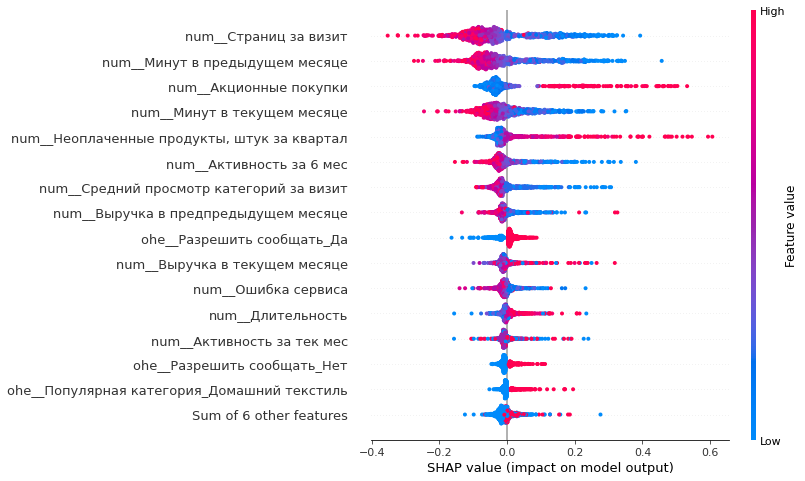

In [84]:
# Диаграмма shap.plots.beeswarm:
shap.plots.beeswarm(shap_values, max_display=16)

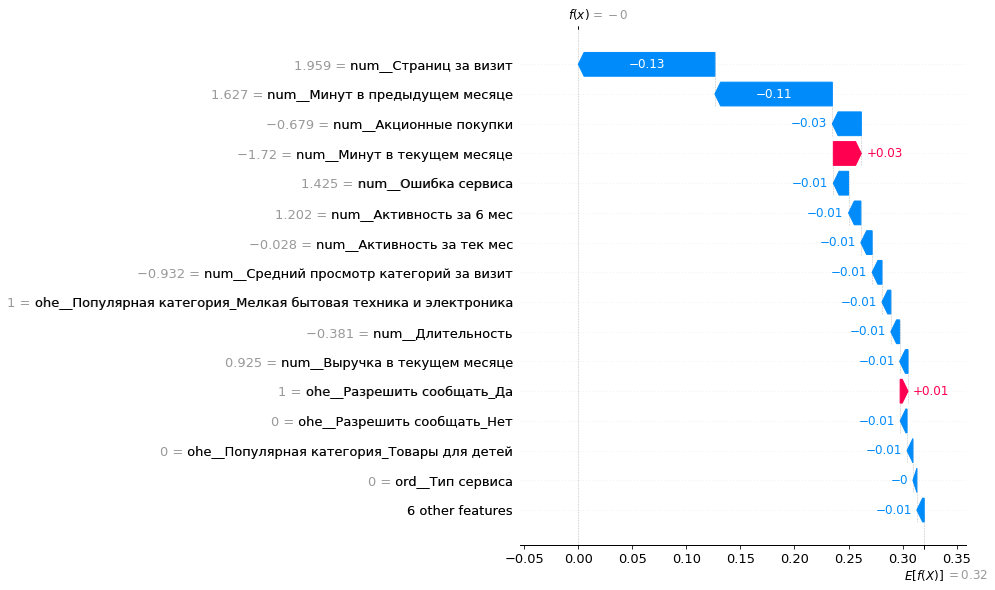

In [85]:
# Диаграмма shap.plots.waterfall:
shap.plots.waterfall(shap_values[0], max_display=16)

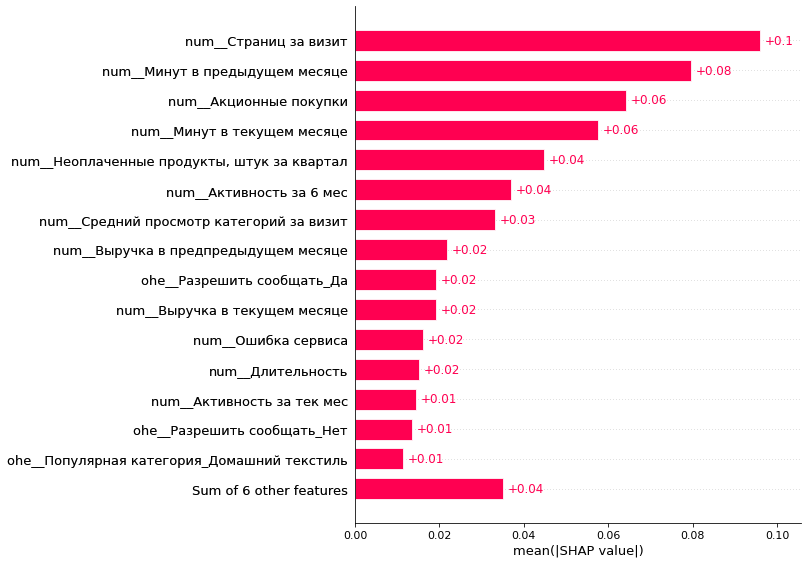

In [86]:
# Диаграмма shap.plots.bar:
shap.plots.bar(shap_values, max_display=16)

#### Вывод:
Наибольшее влияние на прогноз модели оказывают два параметра: количество страниц за визит и количество минут в предыдущем месяце. Можно додумать, что количество минут в текущем месяце также очень важный признак, а влияние от него меньше из-за небольших значений по сравнению с предыдущим месяцем.

При этом практически не влияют на решение значения выручки за оба месяца, количество ошибок сайта, популярные категории. Меньше всего играют роль отказ от рекламы и активность в текущем месяце.

Таким образом, можно попробовать поиграться с параметрами, удалить практически половину из них и посмотреть на качество модели. Однако даже сейчас оно весьма высоко, поэтому необходимости в преобразованиях нет.

### Сегментация покупателей

Теперь необходимо произвести сегментацию покупателей с учётом показаний модели и оставшейся таблицы "money". Для этого построим диаграмму рассеяния по предсказанным вероятностям модели (predict_proba) с учётом прибыли от клиентов.

Для этого сведём все эти данные в основную таблицу. Проблем с этим возникнуть не должно, так как ранее столбец 'id' был преобразован в индексы строк.

In [95]:
# Заменяем индексы на id:
money_1 = money.set_index('id')

In [111]:
# Объединение:
segment = market.merge(money_1, right_index= True, left_index=True)
display(segment.head())
segment.info()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в текущем месяце,Минут в предыдущем месяце,Минут в текущем месяце,Прибыль
id,,,,,,,,,,,,,,,,,
215349,Снизилась,Премиум,Да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12.0,10.0,4.16
215350,Снизилась,Стандарт,Нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8.0,13.0,3.13
215351,Снизилась,Стандарт,Да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11.0,13.0,4.87
215352,Снизилась,Стандарт,Нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8.0,11.0,4.21
215353,Снизилась,Стандарт,Да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10.0,10.0,3.95


<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Покупательская активность               1297 non-null   object 
 1   Тип сервиса                             1297 non-null   object 
 2   Разрешить сообщать                      1297 non-null   object 
 3   Активность за 6 мес                     1297 non-null   float64
 4   Активность за тек мес                   1297 non-null   int64  
 5   Длительность                            1297 non-null   int64  
 6   Акционные покупки                       1297 non-null   float64
 7   Популярная категория                    1297 non-null   object 
 8   Средний просмотр категорий за визит     1297 non-null   int64  
 9   Неоплаченные продукты, штук за квартал  1297 non-null   int64  
 10  Ошибка сервиса                          1297 non-null   in

Теперь сделаем прогноз по всей таблице и результаты внесём в новый столбец. Он будет содержать вероятность, с которой модель определит снижение покупательской активности.

In [124]:
# Внесение вероятностей снижения спроса:
pred_proba = grid_search.predict_proba(market.drop('Покупательская активность', axis=1))[:, 1]
segment['Вероятность снижения спроса'] = pred_proba
display(segment.head())

,Покупательская активность,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в текущем месяце,Минут в предыдущем месяце,Минут в текущем месяце,Прибыль,Вероятность снижения спроса
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,Премиум,Да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12.0,10.0,4.16,0.920961
215350,Снизилась,Стандарт,Нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8.0,13.0,3.13,0.466560
215351,Снизилась,Стандарт,Да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11.0,13.0,4.87,0.882653
215352,Снизилась,Стандарт,Нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8.0,11.0,4.21,0.949513
215353,Снизилась,Стандарт,Да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10.0,10.0,3.95,0.737854


Теперь построим график зависимости прибыли от вероятности снижения спроса и определим сегменты покупателей.

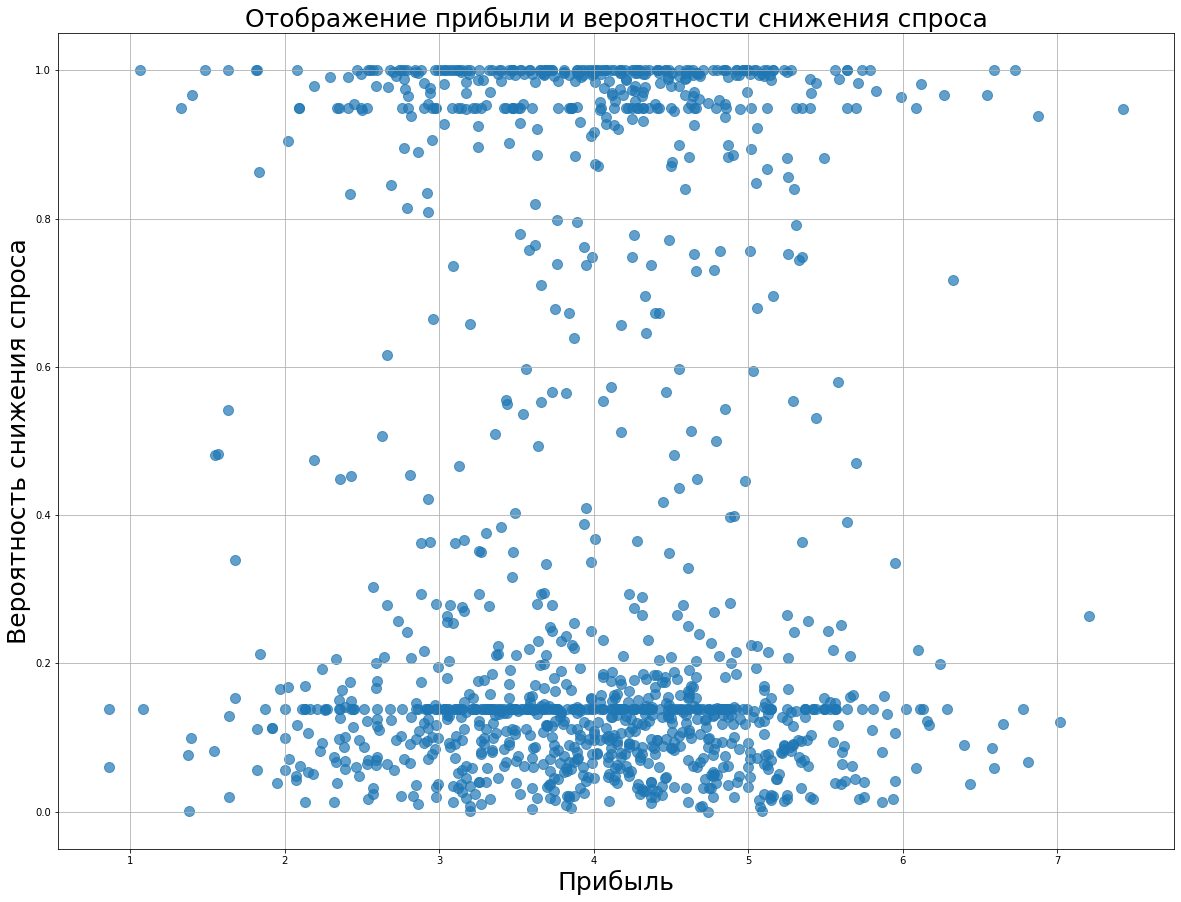

In [126]:
segment.plot.scatter(x='Прибыль', y='Вероятность снижения спроса', 
                        figsize=(20, 15), s=100, alpha=0.7, grid=True)

plt.title('Отображение прибыли и вероятности снижения спроса', fontsize=25)
plt.ylabel('Вероятность снижения спроса', fontsize=25)
plt.xlabel('Прибыль', fontsize=25)
plt.show()

Оказывается, по вероятности снижения спроса есть явные границы в районе 0,15 и 0,9. Имеет смысл включить в интересуемый нас сегмент покупателей с вероятностью большей или равной 0,9.

Что касается прибыли, явный пик недовольных приходится на интервал от 3 до 5.

Выделим в таблице интересующих нас клиентов.

In [131]:
# Сегментация:
target = segment[(segment['Прибыль'] > 3) & (segment['Прибыль'] < 5) & (segment['Вероятность снижения спроса'] > 0.9)]
display(target.head())
target.info()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Активность за 6 мес,Активность за тек мес,Длительность,Акционные покупки,Популярная категория,Средний просмотр категорий за визит,"Неоплаченные продукты, штук за квартал",Ошибка сервиса,Страниц за визит,Выручка в предпредыдущем месяце,Выручка в текущем месяце,Минут в предыдущем месяце,Минут в текущем месяце,Прибыль,Вероятность снижения спроса
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,Премиум,Да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12.0,10.0,4.16,0.920961
215352,Снизилась,Стандарт,Нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8.0,11.0,4.21,0.949513
215356,Снизилась,Стандарт,Да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4566.4,6.0,7.0,4.93,0.999999
215365,Снизилась,Стандарт,Да,3.9,4,167,0.95,Техника для красоты и здоровья,6,4,2,5,4190.0,4799.3,6.0,10.0,3.65,1.000000
215367,Снизилась,Премиум,Да,4.2,4,581,0.40,Товары для детей,5,1,4,1,4668.0,5493.4,8.0,7.0,3.03,0.980907


<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 215349 to 216636
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Покупательская активность               230 non-null    object 
 1   Тип сервиса                             230 non-null    object 
 2   Разрешить сообщать                      230 non-null    object 
 3   Активность за 6 мес                     230 non-null    float64
 4   Активность за тек мес                   230 non-null    int64  
 5   Длительность                            230 non-null    int64  
 6   Акционные покупки                       230 non-null    float64
 7   Популярная категория                    230 non-null    object 
 8   Средний просмотр категорий за визит     230 non-null    int64  
 9   Неоплаченные продукты, штук за квартал  230 non-null    int64  
 10  Ошибка сервиса                          230 non-null    int

Как минимум, 1/6 списка решили больше не закупаться на сайте, печально.

Теперь произведём графический анализ данных по этой группе, выявим основные закономерности и причины недовольства, а также составим предложения по улучшению ситуации.

In [132]:
# Создание сводной таблицы:
seg_2 = target.pivot_table(index='Тип сервиса', values='Покупательская активность', aggfunc='count')
seg_2.columns = ['Количество']
seg_2 = seg_2.sort_values(by='Количество', ascending=True)

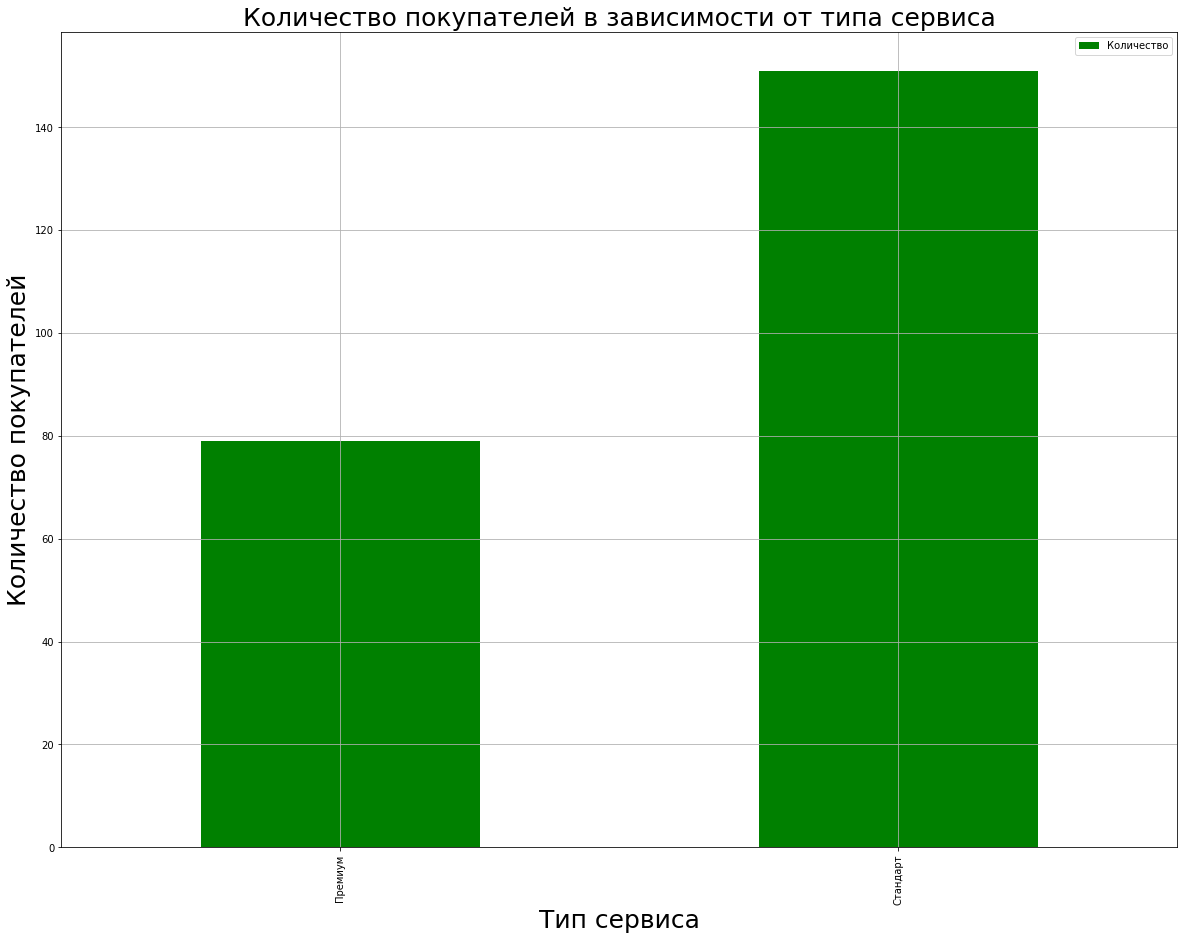

In [134]:
# Диаграмма зависимости количества покупателей от типа сервиса:
seg_2.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='green')
plt.title('Количество покупателей в зависимости от типа сервиса', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Тип сервиса', fontsize=25)
plt.show()

Больше половины отказников имеют статус "Премиум". Окончательно убеждаемся в том, что подписка не гарантирует высокую активность покупателя.

In [136]:
# Создание сводной таблицы:
seg_3 = target.pivot_table(index='Разрешить сообщать', values='Покупательская активность', aggfunc='count')
seg_3.columns = ['Количество']
seg_3 = seg_3.sort_values(by='Количество', ascending=True)

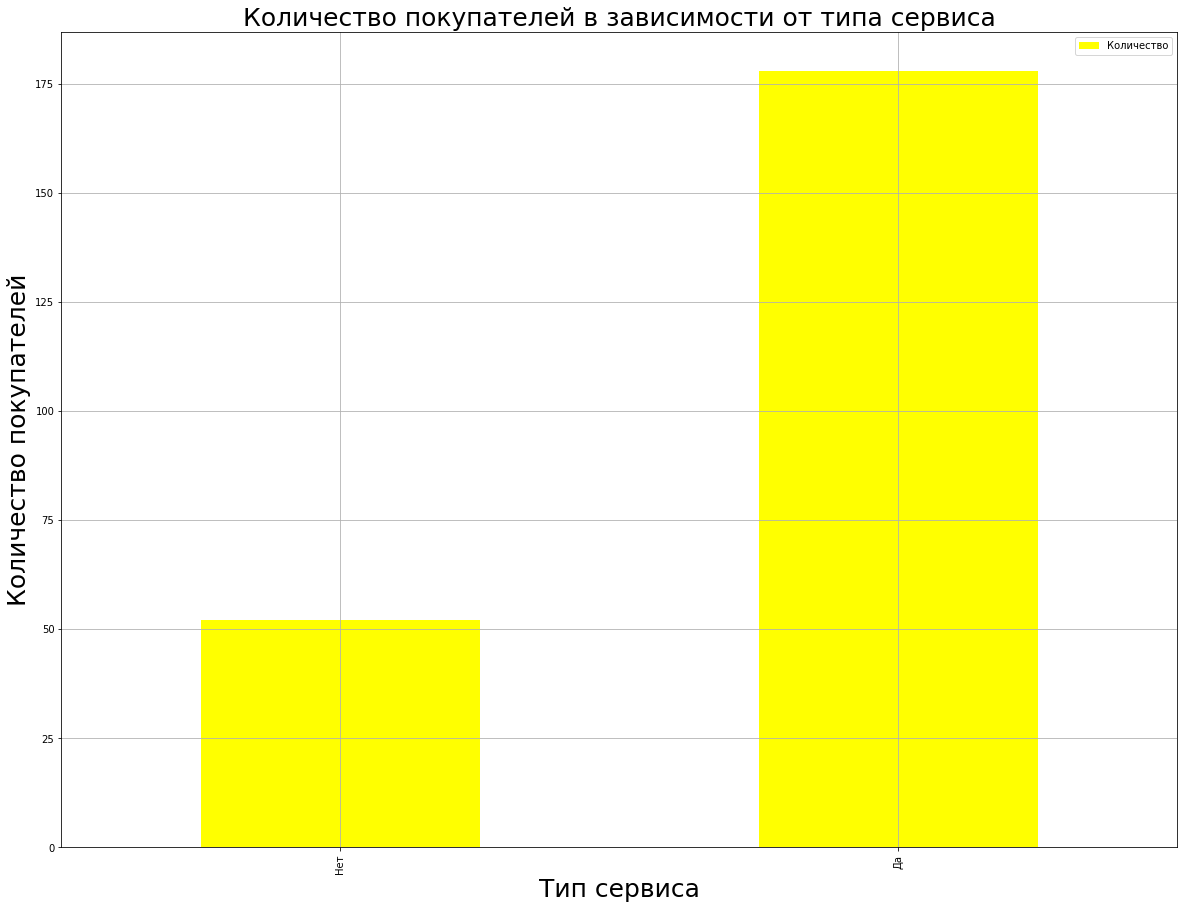

In [137]:
# Диаграмма зависимости количества покупателей от типа сервиса:
seg_3.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='yellow')
plt.title('Количество покупателей в зависимости от согласия на рекламу', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Согласие', fontsize=25)
plt.show()

Рекламу получало большинство. Значит, увеличение количества рассылок на ситуацию не повлияет.

In [142]:
# Создание сводной таблицы:
seg_7 = target.pivot_table(index='Акционные покупки', values='Тип сервиса', aggfunc='count')
seg_7.columns = ['Количество']
seg_7 = seg_7.sort_values(by='Акционные покупки', ascending=True)

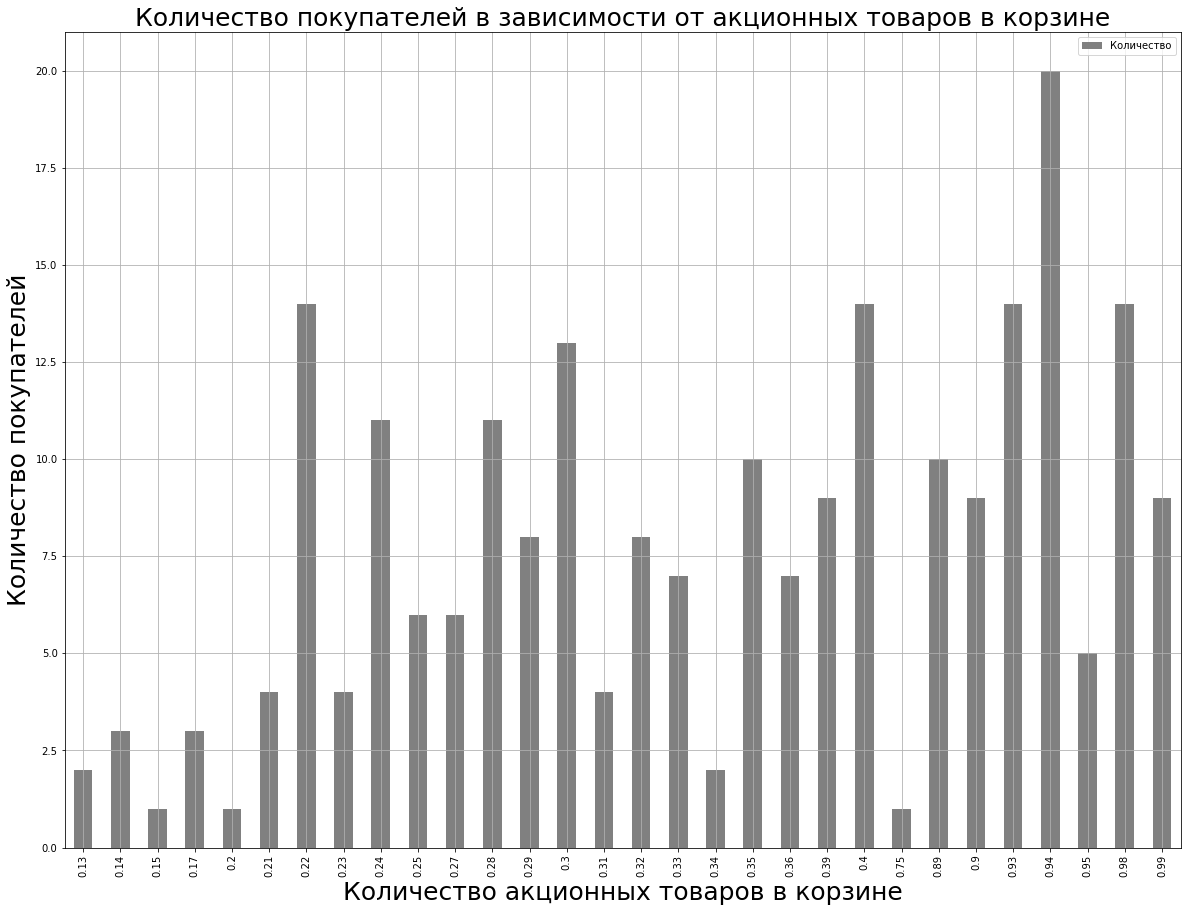

In [146]:
# Диаграмма зависимости количества покупателей от акционных товаров в корзине:
seg_7.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='grey')
plt.title('Количество покупателей в зависимости от акционных товаров в корзине', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество акционных товаров в корзине', fontsize=25)
plt.show()

Акциями примерно в равной степени все пользовались, при чём тех, кто скупает всё только по ним немного.

In [149]:
# Создание сводной таблицы:
seg_8 = target.pivot_table(index='Популярная категория', values='Тип сервиса', aggfunc='count')
seg_8.columns = ['Количество']
seg_8 = seg_8.sort_values(by='Количество', ascending=True)

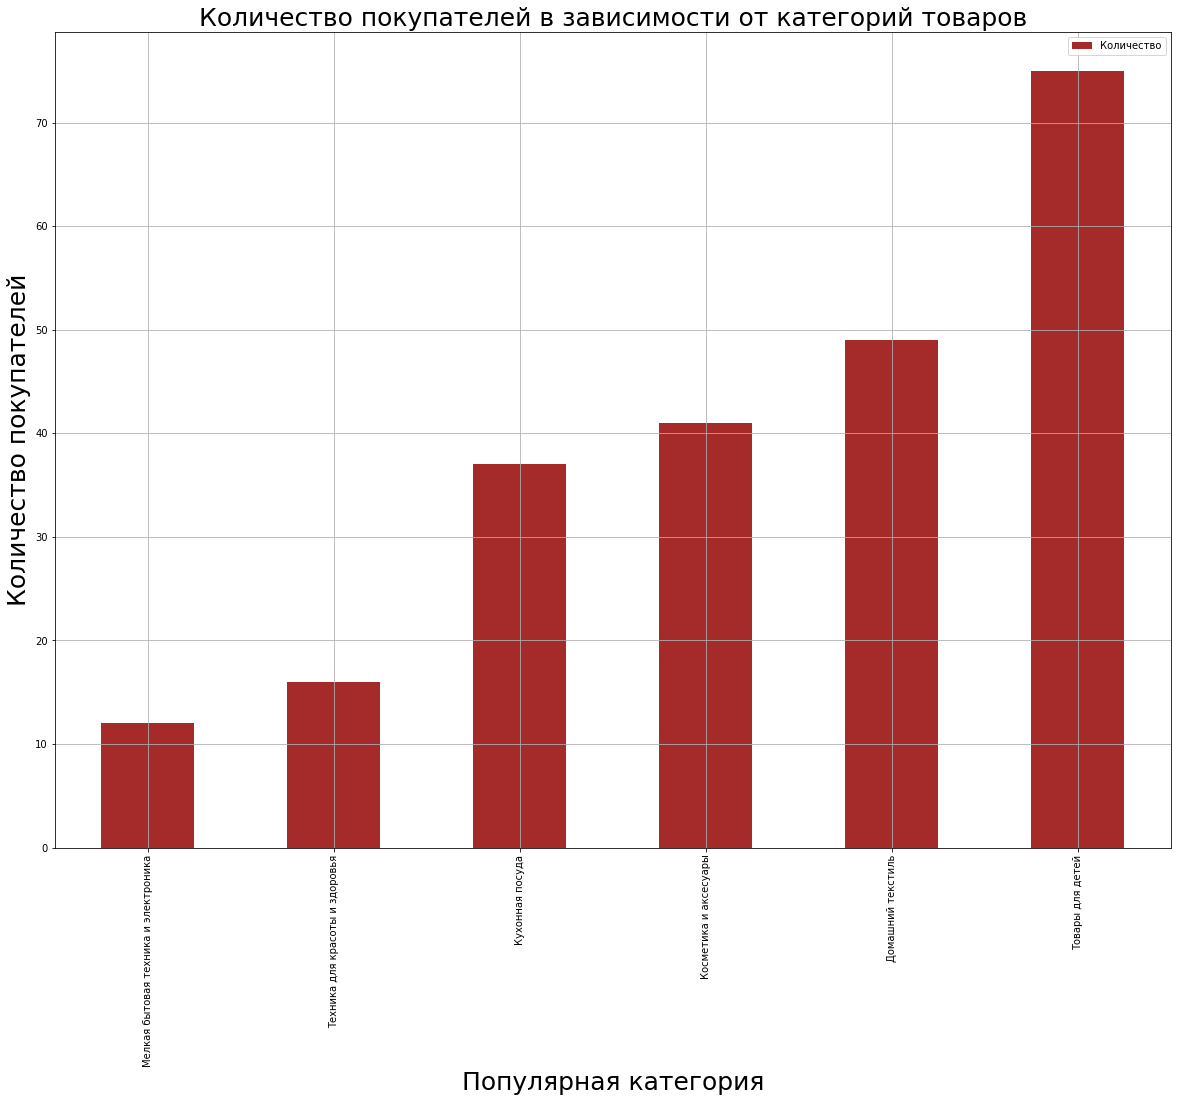

In [150]:
# Диаграмма зависимости количества покупателей от категорий товаров:
seg_8.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='brown')
plt.title('Количество покупателей в зависимости от категорий товаров', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Популярная категория', fontsize=25)
plt.show()

Больше всего людей интересовали товары для детей. Лишь небольшая часть заходила за техникой.

In [151]:
# Создание сводной таблицы:
seg_9 = target.pivot_table(index='Средний просмотр категорий за визит', values='Тип сервиса', aggfunc='count')
seg_9.columns = ['Количество']
seg_9 = seg_9.sort_values(by='Средний просмотр категорий за визит', ascending=True)

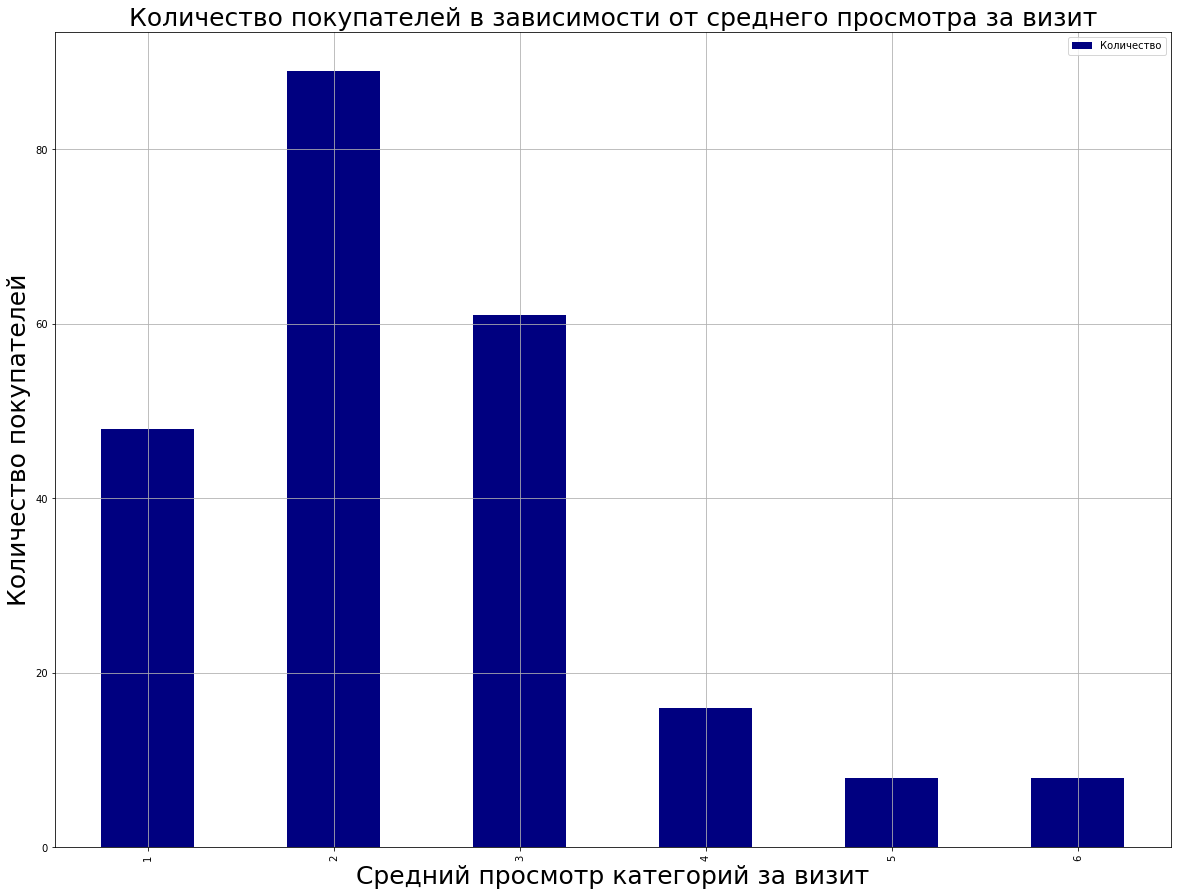

In [152]:
# Диаграмма зависимости количества покупателей от среднего просмотра за визит:
seg_9.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='navy')
plt.title('Количество покупателей в зависимости от среднего просмотра за визит', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Средний просмотр категорий за визит', fontsize=25)
plt.show()

Больше половины ушедших просматривали за раз по 2-3 категории.

In [153]:
# Создание сводной таблицы:
seg_10 = target.pivot_table(index='Неоплаченные продукты, штук за квартал', values='Тип сервиса', aggfunc='count')
seg_10.columns = ['Количество']
seg_10 = seg_10.sort_values(by='Неоплаченные продукты, штук за квартал', ascending=True)

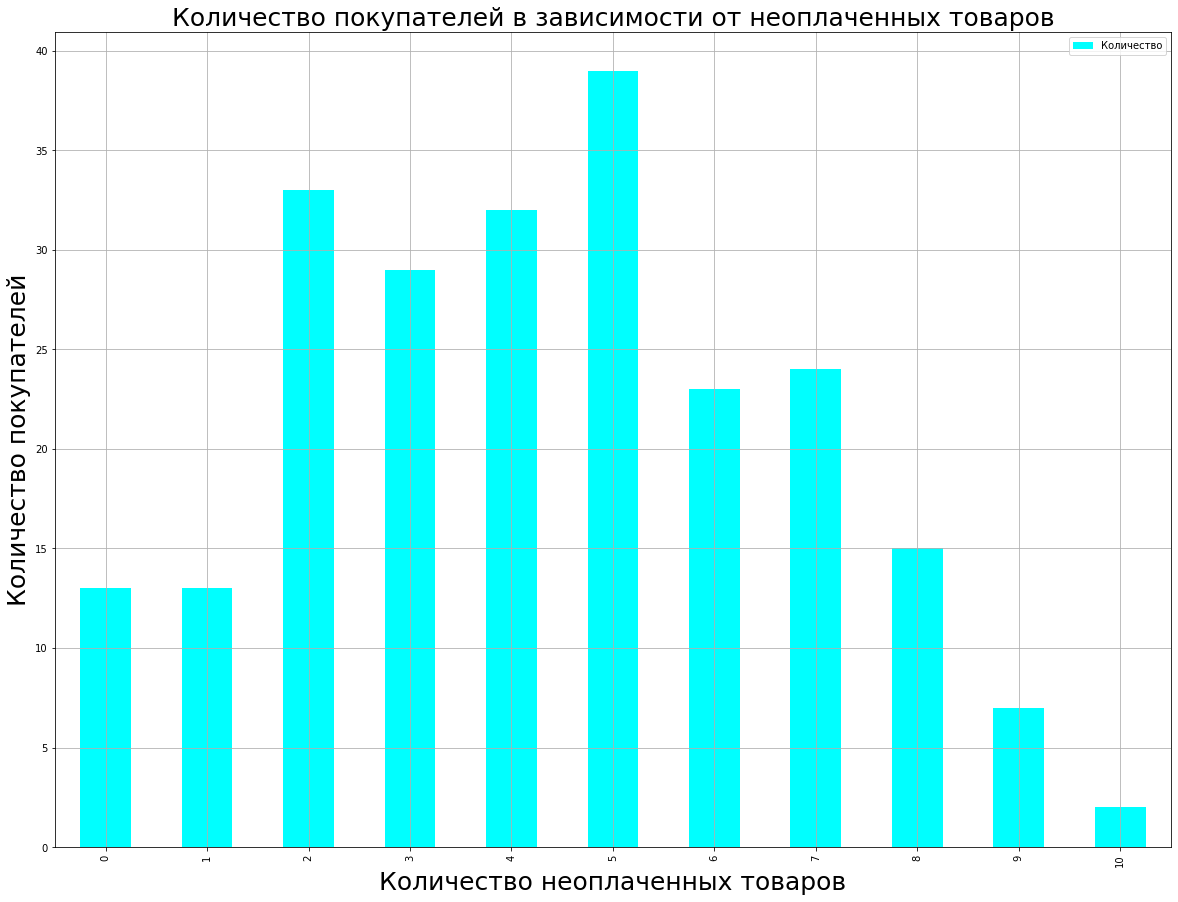

In [154]:
# Диаграмма зависимости количества покупателей от неоплаченных продуктов в корзине:
seg_10.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='aqua')
plt.title('Количество покупателей в зависимости от неоплаченных товаров', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество неоплаченных товаров', fontsize=25)
plt.show()

В основном у них в корзине лежало от 2 до 5 (даже до 7) неоплаченных товаров. Либо не было денег, либо про них забыли.

In [155]:
# Создание сводной таблицы:
seg_11 = target.pivot_table(index='Ошибка сервиса', values='Тип сервиса', aggfunc='count')
seg_11.columns = ['Количество']
seg_11 = seg_11.sort_values(by='Ошибка сервиса', ascending=True)

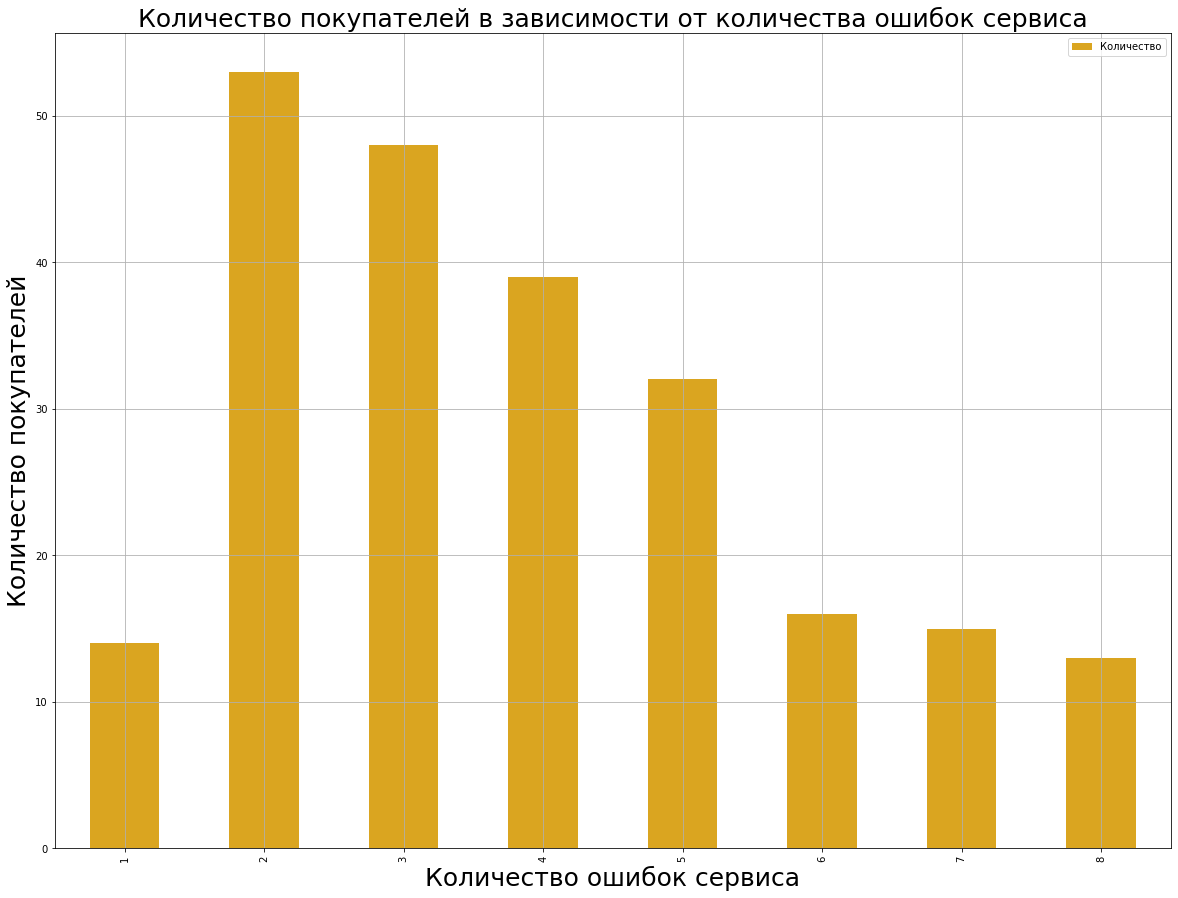

In [156]:
# Диаграмма зависимости количества покупателей от количества ошибок сервиса:
seg_11.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='goldenrod')
plt.title('Количество покупателей в зависимости от количества ошибок сервиса', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество ошибок сервиса', fontsize=25)
plt.show()

БОльшая часть сталкивалась с 2-5 ошибками сервиса.

In [157]:
# Создание сводной таблицы:
seg_12 = target.pivot_table(index='Страниц за визит', values='Тип сервиса', aggfunc='count')
seg_12.columns = ['Количество']
seg_12 = seg_12.sort_values(by='Страниц за визит', ascending=True)

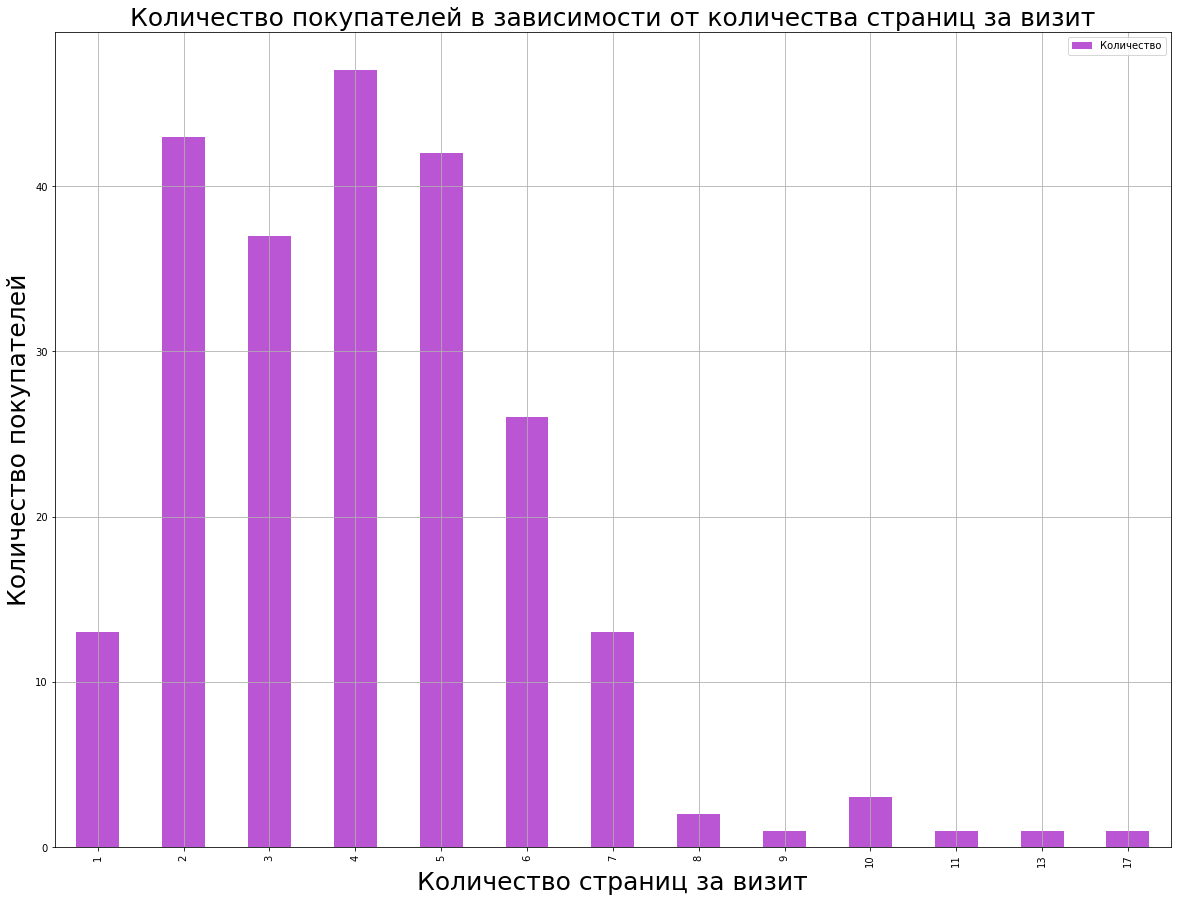

In [158]:
# Диаграмма зависимости количества покупателей от количества страниц за визит:
seg_12.plot(y='Количество', kind='bar', grid=True, figsize=(20, 15), color='mediumorchid')
plt.title('Количество покупателей в зависимости от количества страниц за визит', fontsize=25)
plt.ylabel('Количество покупателей', fontsize=25)
plt.xlabel('Количество страниц за визит', fontsize=25)
plt.show()

В среднем за сеанс покупатели просматривали по 2-5 страниц.

#### Вывод:
В ходе сегментация была отобрана группа ушедших покупателей, всего их оказалось 230. Для их сегментации были установлены ограничения, определяемые на основе модели МО:

  1) Вероятность снижения спроса по предсказаниям больше или равна 0,9.

  2) Что касается прибыли, явный пик недовольных приходится на интервал от 3 до 5.

После анализа остальных параметров заключаем:

   - Тип подписки играет незначительную роль.
   - Рекламу получало большинство. Значит, увеличение количества рассылок на ситуацию не повлияет.
   - Акциями примерно в равной степени все пользовались, при чём тех, кто скупает всё только по ним немного.
   - Больше всего людей интересовали товары для детей. Лишь небольшая часть заходила за техникой.
   - Больше половины ушедших просматривали за раз по 2-3 категории.
   - В основном у них в корзине лежало от 2 до 5 (даже до 7) неоплаченных товаров. Либо не было денег, либо про них забыли, либо нашли варианты получше на других платформах.
   - БОльшая часть сталкивалась с 2-5 ошибками сервиса.
   - В среднем за сеанс покупатели просматривали по 2-5 страниц.
   
По общим рекомендациям имеем следующее:
   - Конкретную причину ухода установить сложно, скорее всего повлияла совокупность различных факторов;
   - Наиболее популярная категория "Товары для детей" нуждается в пересмотре, возможно, проблема в ассортименте товаров, либо в их стоимости;
   - Для того, чтобы сократить количество отложенных товаров можно попробовать добавить уведомления для них, чтобы пользователь чаще проверял свою корзину;
   - Одной из ключевых проблем низкой активности могли стать ошибки сайта, необходимо провести его тесты и заняться улучшением.

### Общий вывод

##### Отчёт о проделанной работе:

После распаковки файлов из общего вида всех таблиц: пропусков нигде нет, все строки заполнены; типы данных вопросов не вызывают. Можем поменять названия некоторых столбцов.

В ходе предобработки данных была произведена проверка на явные и неявные дубликаты, откорректированы названия столбцов в первом датафрейме, обработаны данные в столбцах "Тип сервиса" и "Разрешить сообщать". Также обработаны данные в столбцах "Период" в двух других датафреймах. Таблицы готовы к исследовательскому анализу.

В ходе исследовательского анализа данных обнаружили 3 "новеньких" - покупатели, которые совершали покупки только в текущем месяце. Для дальнейшего анализа данные о них бесполезны, поэтому удалили их из всех таблиц.

В ходе анализа boxplot'ов количественных данных всех таблиц был выявлен и удалён один явный выброс из "market_money"; остальные данные вопросов не вызывают.

После рассмотрения гистограмм по основной таблице можно сказать о следующем: 
  - больше трети покупателей перестали активно закупаться на ресурсе;
  - из общего числа покупателей только треть имеет статус "Премиум";
  - 70% пользователей согласились на рекламную рассылку;
  - люди либо редко пользуются акциями (до 40% товаров в корзине), либо очень часто (89%+);
  - наибольшая популярность у категории "товары для детей", остальные имеют популярность немного ниже, без резких перепадов;
  - в основном люди просматривают по 2-4 категории за раз.
  
Нормальное распределение наблюдается у следующих величин: "страниц за визит", "ошибки сервиса", "категорий за визит", "Неоплаченные продукты".

Распределение прибыли из датафрейма "money" также является нормальным. В распределении минут, проведённых на сайте из "market_time" имеются выбросы.

Данные проанализированы и готовы к дальнейшим преобразованиям.

Объединение основных таблиц прошло успешно. Теперь имеем два датафрейма: "market" и "money". Данные полностью готовы для корреляционного анализа и обучения моделей.

В ходе корреляционного анализа были посчитаны коэффициенты корреляции Спирмана для всех параметров в итоговой таблице "market". Они показали, что два признака не являются статистически значимыми, будет повод сравнить предсказания моделей с ними и без. Никакой признак не обладает сильной линейной связью с целевым, значимыми можно назвать только 4 из них.

Мультиколлинеарности признаков не обнаружено. Данные готовы для обучения моделей.

Собран пайплайн для подготовки данных и обучения четырёх видов моделей: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Лучше всех обучилась модель опорных векторов при обработке StandardScaler() со следующими гиперпараметрами: kernel='poly', degree=2, random_state=42. Метрика ROC-AUC показала отличный результат за 0.9.

Предсказания по тестовой выборке так же оказались надёжными, значение метрики просело незначительно.

Наибольшее влияние на прогноз модели оказывают два параметра: количество страниц за визит и количество минут в предыдущем месяце. Можно додумать, что количество минут в текущем месяце также очень важный признак, а влияние от него меньше из-за небольших значений по сравнению с предыдущим месяцем.

При этом практически не влияют на решение значения выручки за оба месяца, количество ошибок сайта, популярные категории. Меньше всего играют роль отказ от рекламы и активность в текущем месяце.

Таким образом, можно попробовать поиграться с параметрами, удалить практически половину из них и посмотреть на качество модели. Однако даже сейчас оно весьма высоко, поэтому необходимости в преобразованиях нет.

В ходе сегментация была отобрана группа ушедших покупателей, всего их оказалось 230. Для их сегментации были установлены ограничения, определяемые на основе модели МО:

  1) Вероятность снижения спроса по предсказаниям больше или равна 0,9.

  2) Что касается прибыли, явный пик недовольных приходится на интервал от 3 до 5.

После анализа остальных параметров заключаем:

   - Тип подписки играет незначительную роль.
   - Рекламу получало большинство. Значит, увеличение количества рассылок на ситуацию не повлияет.
   - Акциями примерно в равной степени все пользовались, при чём тех, кто скупает всё только по ним немного.
   - Больше всего людей интересовали товары для детей. Лишь небольшая часть заходила за техникой.
   - Больше половины ушедших просматривали за раз по 2-3 категории.
   - В основном у них в корзине лежало от 2 до 5 (даже до 7) неоплаченных товаров. Либо не было денег, либо про них забыли, либо нашли варианты получше на других платформах.
   - БОльшая часть сталкивалась с 2-5 ошибками сервиса.
   - В среднем за сеанс покупатели просматривали по 2-5 страниц.
   
##### Итог и рекомендации:
Работа выполнена в полном объёме, обученная модель МО имеет достаточно высокую метрику и в дополнительных данных не нуждается. Дополнительные исследования в рамках этой задачи не понадобятся.

По общим рекомендациям имеем следующее:
   - Конкретную причину ухода установить сложно, скорее всего повлияла совокупность различных факторов;
   - Наиболее популярная категория "Товары для детей" нуждается в пересмотре, возможно, проблема в ассортименте товаров, либо в их стоимости;
   - Для того, чтобы сократить количество отложенных товаров можно попробовать добавить уведомления для них, чтобы пользователь чаще проверял свою корзину;
   - Одной из ключевых проблем низкой активности могли стать ошибки сайта, необходимо провести его тесты и заняться улучшением.